# **Heart Disease Explanatory Data Analysis and Prediction with Models** 🫀






# Importing Libraries

In [ ]:
import io
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import plotly.express as px

from urllib.request import urlopen
import json
import plotly.express as px


import missingno as msno
from scipy import stats

import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from plotly.subplots import make_subplots


# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV



To add tables, installing tabulate

In [ ]:
pip install tabulate

In [ ]:
!pip install plotly

**Connecting to Google Colab and Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/Heart Project/"
os.chdir(pathname)

filename = "heartdatacleaned.csv"
df = pd.read_csv(filename)


Mounted at /content/drive


# Information About the Data Set

Checking the dimensions (number of rows and columns) of the DataFrame. (Here we have 319,795 rows and 18 columns)

In [ ]:
df.shape

(246022, 40)

Here we see the information of our Data Frame. Specifically the Non-Null Count and Dtype. Since we have 319795 in count, that means we dont have any missing values. For the Dtype we can see that we have both float64 and object, float being numerical columns and object for being categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

Here we can see an issue, where AgeCategory is an object type not a float64. This means that we are treating age as a categorical variable, and we have to change that

In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadAngina'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of getting heart disease if you have angina: {probability_heart_disease_with_angina:.2f}%")

Probability of getting heart disease if you have angina: 45.29%


In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadAngina'] == "Yes"]

# Calculate the probability of not having heart disease among individuals with angina
probability_no_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "No").mean() * 100

print(f"Probability of not getting heart disease if you have angina: {probability_no_heart_disease_with_angina:.2f}%")

Probability of not getting heart disease if you have angina: 54.71%


In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadSkinCancer'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of getting heart disease if you have angina: {probability_heart_disease_with_angina:.2f}%")

Probability of getting heart disease if you have angina: 9.13%


In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadCOPD'] == "Yes"]

# Calculate the probability of not having heart disease among individuals with angina
probability_no_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "No").mean() * 100

print(f"Probability of not getting heart disease if you have COPD: {probability_no_heart_disease_with_angina:.2f}%")

Probability of not getting heart disease if you have COPD: 84.07%


In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadCOPD'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of getting heart disease if you have COPD: {probability_heart_disease_with_angina:.2f}%")

Probability of getting heart disease if you have COPD: 15.93%


In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadKidneyDisease'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of GETTING heart disease if you have COPD: {probability_heart_disease_with_angina:.2f}%")


# Filter the dataset for individuals with angina
angina_df = df[df['HadKidneyDisease'] == "Yes"]

# Calculate the probability of not having heart disease among individuals with angina
probability_no_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "No").mean() * 100

print(f"Probability of NOT getting heart disease if you have COPD: {probability_no_heart_disease_with_angina:.2f}%")

Probability of GETTING heart disease if you have COPD: 16.79%
Probability of NOT getting heart disease if you have COPD: 83.21%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['FluVaxLast12'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of GETTING heart disease if you have COPD: {probability_heart_disease_with_angina:.2f}%")


# Filter the dataset for individuals with angina
angina_df = df[df['FluVaxLast12'] == "Yes"]

# Calculate the probability of not having heart disease among individuals with angina
probability_no_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "No").mean() * 100

print(f"Probability of NOT getting heart disease if you have COPD: {probability_no_heart_disease_with_angina:.2f}%")

Probability of GETTING heart disease if you have COPD: 6.42%
Probability of NOT getting heart disease if you have COPD: 93.58%


In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadDiabetes'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of GETTING heart disease if you have COPD: {probability_heart_disease_with_angina:.2f}%")


# Filter the dataset for individuals with angina
angina_df = df[df['ChestScan'] == "Yes"]

# Calculate the probability of not having heart disease among individuals with angina
probability_no_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "No").mean() * 100

print(f"Probability of NOT getting heart disease if you have COPD: {probability_no_heart_disease_with_angina:.2f}%")

Probability of GETTING heart disease if you have COPD: 9.91%
Probability of NOT getting heart disease if you have COPD: 90.09%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

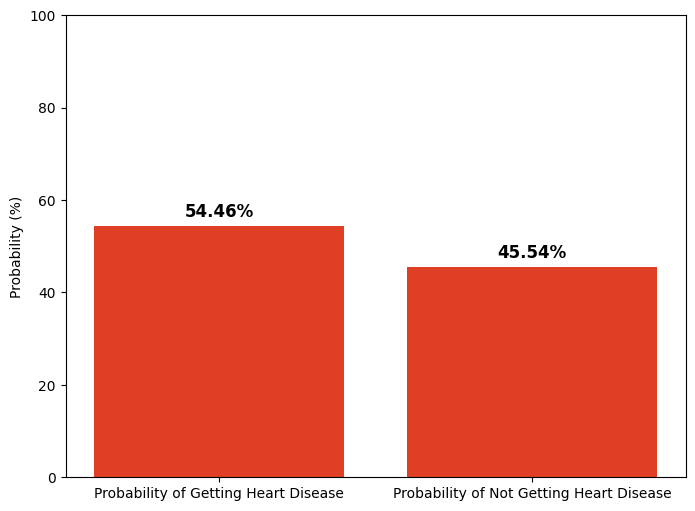

In [ ]:
import matplotlib.pyplot as plt

# Define the probabilities
probabilities = [54.46, 45.54]
labels = ["Probability of Getting Heart Disease", "Probability of Not Getting Heart Disease"]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, probabilities, color=['#DE3F25', '#DE3F25'])
plt.ylabel('Probability (%)')
plt.title('')
plt.ylim(0, 100)

# Add the percentages on top of the bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 1, f"{prob:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

In [ ]:
# Convert 'No' to 0 and 'Yes' to 1
df['HadHeartAttack'] = df['HadHeartAttack'].map({'No': 0, 'Yes': 1})


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the probability of getting heart disease for women
probability_heart_disease_female = df[df['Sex'] == 'Female']['HadHeartAttack'].mean()

# Calculate the probability of getting heart disease for men
probability_heart_disease_male = df[df['Sex'] == 'Male']['HadHeartAttack'].mean()

# Create a bar chart to visualize the probabilities
genders = ['Female', 'Male']
probabilities = [probability_heart_disease_female * 100, probability_heart_disease_male * 100]

plt.figure(figsize=(8, 6))
plt.bar(genders, probabilities, color='#DE3F25')
plt.ylabel('Probability of Getting Heart Disease (%)')
plt.title('Probability of Getting Heart Disease by Gender')

# Add percentages on top of the bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 1, f"{prob:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

TypeError: ignored

In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadDiabetes2'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of GETTING heart disease if you have COPD: {probability_heart_disease_with_angina:.2f}%")


# Filter the dataset for individuals with angina
angina_df = df[df['HadDiabetes2'] == "Yes"]

# Calculate the probability of not having heart disease among individuals with angina
probability_no_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "No").mean() * 100

print(f"Probability of NOT getting heart disease if you have COPD: {probability_no_heart_disease_with_angina:.2f}%")

Probability of GETTING heart disease if you have COPD: 13.76%
Probability of NOT getting heart disease if you have COPD: 86.24%


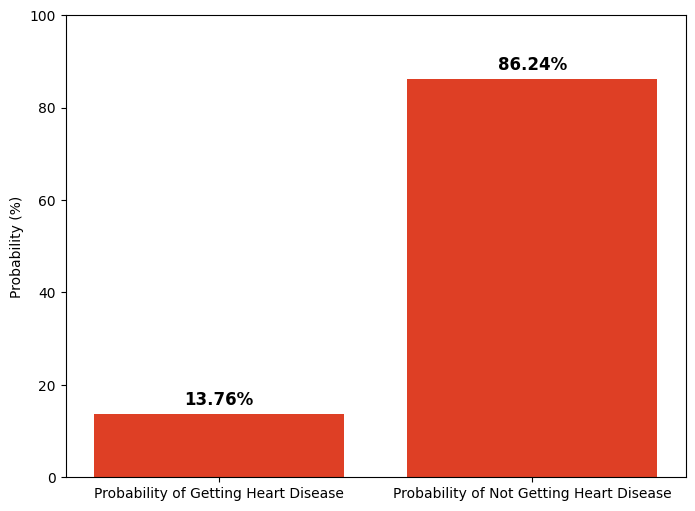

In [ ]:
import matplotlib.pyplot as plt

# Define the probabilities
probabilities = [13.76, 86.24]
labels = ["Probability of Getting Heart Disease", "Probability of Not Getting Heart Disease"]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, probabilities, color=['#DE3F25', '#DE3F25'])
plt.ylabel('Probability (%)')
plt.title('')
plt.ylim(0, 100)

# Add the percentages on top of the bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 1, f"{prob:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

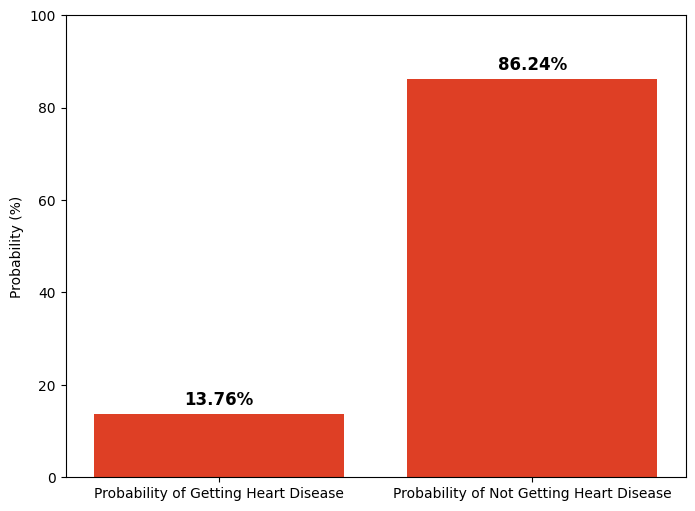

In [ ]:
import matplotlib.pyplot as plt

# Define the probabilities
probabilities = [13.76, 86.24]
labels = ["Probability of Getting Heart Disease", "Probability of Not Getting Heart Disease"]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, probabilities, color=['#DE3F25', '#DE3F25'])
plt.ylabel('Probability (%)')
plt.title('')
plt.ylim(0, 100)

# Add the percentages on top of the bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 1, f"{prob:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

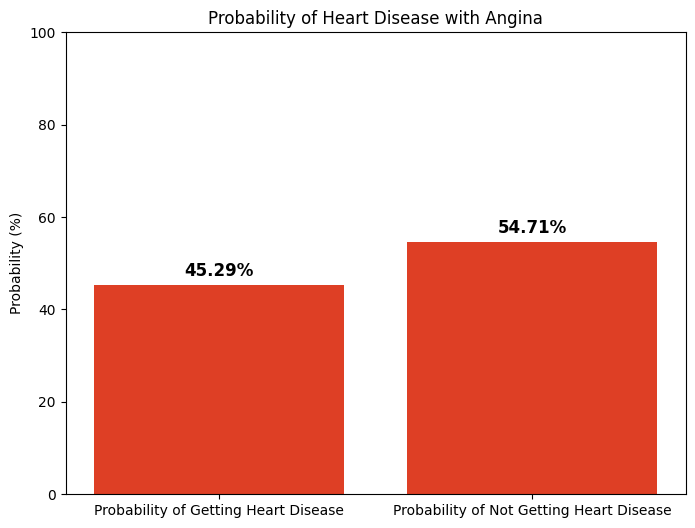

In [ ]:
import matplotlib.pyplot as plt

# Define the probabilities
probabilities = [45.29, 54.71]
labels = ["Probability of Getting Heart Disease", "Probability of Not Getting Heart Disease"]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, probabilities, color=['#DE3F25', '#DE3F25'])
plt.ylabel('Probability (%)')
plt.title('Probability of Heart Disease with Angina')
plt.ylim(0, 100)

# Add the percentages on top of the bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 1, f"{prob:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

# Cleaning and Preprocessing the Data

We apply a function to calculate the mean age and make it a continous feature, so its numerical

In [ ]:
age_mapping = {
    "Age 18 to 24": 22,
    "Age 25 to 29": 27,
    "Age 30 to 34": 32,
    "Age 35 to 39": 37,
    "Age 40 to 44": 42,
    "Age 45 to 49": 47,
    "Age 50 to 54": 52,
    "Age 55 to 59": 57,
    "Age 60 to 64": 62,
    "Age 65 to 69": 67,
    "Age 70 to 74": 72,
    "Age 75 to 79": 77,
    "Age 80 or older": 85
}

df['AgeNumeric'] = df['AgeCategory'].map(age_mapping)
average_age = df['AgeNumeric'].mean()
print(f"Average Age: {average_age:.2f}")

Average Age: 55.81


We changed the name of AgeCategory to Age Numeric

Making a new Variable for Physical Health Categories to have them separated and not just numerical numbers from 0-30

In [ ]:
import pandas as pd

# Assuming you have a DataFrame df with the column "PhysicalHealthDays"

# Define the bin edges and labels for the new categories
bin_edges = [-1, 0, 5, 9, 14, 19, 24, 30]

# Define the labels for the categories
bin_labels = ['0', '1-5', '6-9', '10-14', '15-19', '20-24', '25-30']

# Categorize the data
df['PhysicalHealthCategories'] = pd.cut(df['PhysicalHealthDays'], bins=bin_edges, labels=bin_labels, include_lowest=True)



Now doing the same, making a new Variable for Mental Health Categories

In [ ]:
# Define the bin edges and labels for the new categories
bin_edges = [-1, 0, 5, 9, 14, 19, 24, 30]

# Define the labels for the categories
bin_labels = ['0', '1-5', '6-9', '10-14', '15-19', '20-24', '25-30']

# Categorize the data
df['MentalHealthCategories'] = pd.cut(df['MentalHealthDays'], bins=bin_edges, labels=bin_labels, include_lowest=True)



Now we do the same for SleepHours

In [ ]:
# Define the bin edges and labels for the new categories
bin_edges = [-1, 0, 5, 9, 14, 19, 24]

# Define the labels for the categories
bin_labels = ['0', '1-5', '6-9', '10-13', '14-16', '17-24']

# Categorize the data
df['SleepHourCategories'] = pd.cut(df['SleepHours'], bins=bin_edges, labels=bin_labels, include_lowest=True)


Now we do the same for BMI

In [ ]:
# Define the custom bin edges for BMI categories
bmi_bin_edges = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 44.9, 49.9, float('inf')]

# Define the labels for the BMI categories
bmi_bin_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III', 'Obesity Class IV', 'Obesity Class V']

# Categorize the BMI data
df['BMI2'] = pd.cut(df['BMI'], bins=bmi_bin_edges, labels=bmi_bin_labels, include_lowest=True)

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'

# Define BMI categories
bmi_categories = ['Underweight', 'Normal Weight', 'Overweight']

# Initialize a dictionary to store probabilities
bmi_probabilities = {}

# Calculate the probability for each BMI category
for category in bmi_categories:
    total_count = df[df['BMI2'] == category].shape[0]
    probability = total_count / df.shape[0]
    bmi_probabilities[category] = probability

# Print the probabilities
for category, probability in bmi_probabilities.items():
    print(f'Probability of {category} BMI: {probability:.4f}')

Probability of Underweight BMI: 0.0153
Probability of Normal Weight BMI: 0.2797
Probability of Overweight BMI: 0.3559


In [ ]:
heart_attack_counts = df['HadHeartAttack'].value_counts()
print(heart_attack_counts)

No     232587
Yes     13435
Name: HadHeartAttack, dtype: int64


In [ ]:
# Probabilities
probability_heart_disease = 0.0546
probability_underweight = 0.0153
probability_normal_weight = 0.2797
probability_overweight = 0.3559

# Calculate conditional probabilities
probability_heart_disease_given_underweight = probability_heart_disease / probability_underweight
probability_heart_disease_given_normal_weight = probability_heart_disease / probability_normal_weight
probability_heart_disease_given_overweight = probability_heart_disease / probability_overweight

# Print the conditional probabilities
print(f"If someone is underweight, the probability of having heart disease is: {probability_heart_disease_given_underweight:.4f}")
print(f"If someone is normal weight, the probability of having heart disease is: {probability_heart_disease_given_normal_weight:.4f}")
print(f"If someone is overweight, the probability of having heart disease is: {probability_heart_disease_given_overweight:.4f}")

If someone is underweight, the probability of having heart disease is: 3.5686
If someone is normal weight, the probability of having heart disease is: 0.1952
If someone is overweight, the probability of having heart disease is: 0.1534


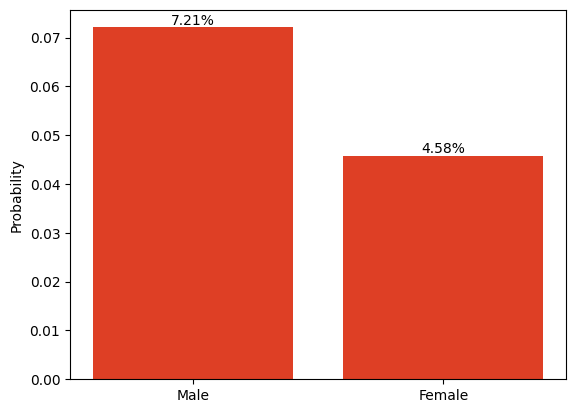

In [ ]:
import matplotlib.pyplot as plt

# Probabilities
probabilities = [0.0721, 0.0458]
categories = ['Male', 'Female']
color = '#DE3F25'

# Create the bar graph
plt.bar(categories, probabilities, color=color)
plt.title('')
plt.ylabel('Probability')

# Annotate the bars with the percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()

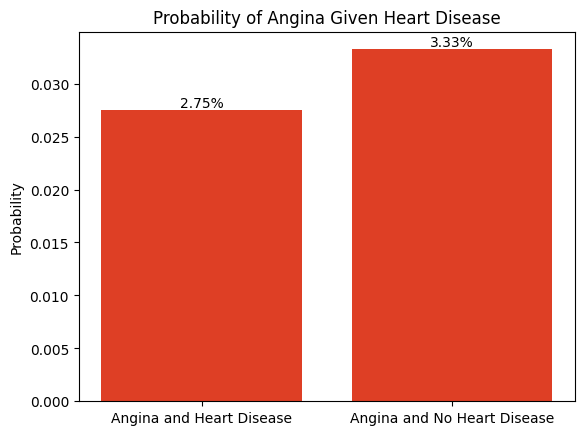

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of having angina and heart disease
angina_and_heart_disease_probability = (df[(df['HadAngina'] == 'Yes') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the probability of having angina without heart disease
angina_and_no_heart_disease_probability = (df[(df['HadAngina'] == 'Yes') & (df['HadHeartAttack'] == 'No')].shape[0] / df.shape[0])

# Create a bar chart
categories = ['Angina and Heart Disease', 'Angina and No Heart Disease']
probabilities = [angina_and_heart_disease_probability, angina_and_no_heart_disease_probability]

# Set the colors
colors = ['#DE3F25', '#DE3F25']

# Create the bar chart
plt.bar(categories, probabilities, color=colors)
plt.title('Probability of Angina Given Heart Disease')
plt.ylabel('Probability')

# Annotate the bars with the percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()


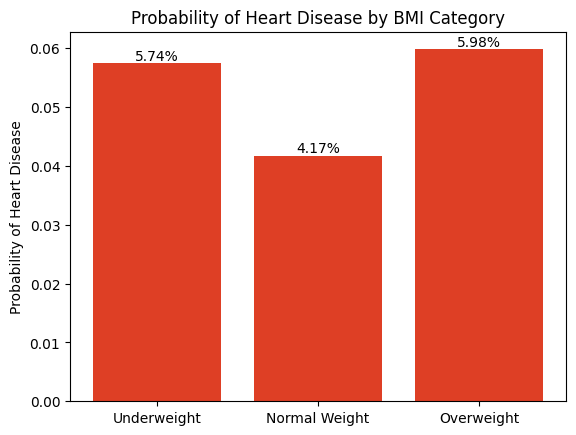

In [ ]:
import matplotlib.pyplot as plt

# Probabilities
probabilities = [0.0574, 0.0417, 0.0598]
categories = ['Underweight', 'Normal Weight', 'Overweight']
color = '#DE3F25'

# Create the bar graph
plt.bar(categories, probabilities, color=color)
plt.title('Probability of Heart Disease by BMI Category')
plt.ylabel('Probability of Heart Disease')

# Annotate the bars with the percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()

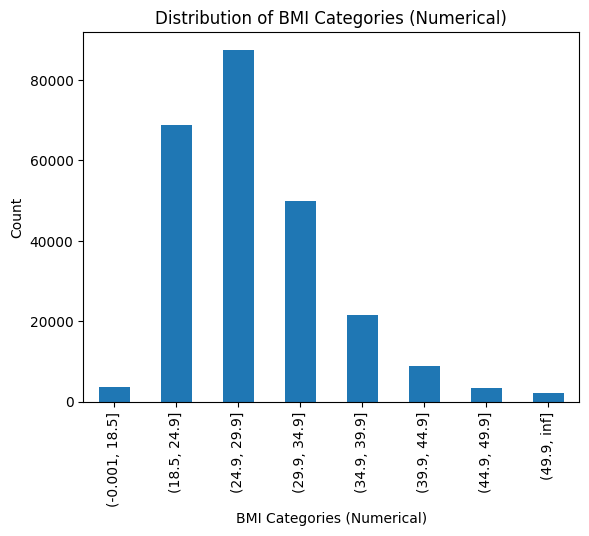

In [ ]:

# Define the custom bin edges for BMI categories
bmi_bin_edges = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 44.9, 49.9, float('inf')]

# Categorize the BMI data using the numerical categories
df['BMI3'] = pd.cut(df['BMI'], bins=bmi_bin_edges, include_lowest=True)

# Group the data by BMICategories and count the occurrences
bmi_category_counts = df['BMI3'].value_counts()

# Sort the categories in ascending order
bmi_category_counts = bmi_category_counts.sort_index()

# Create a bar graph
bmi_category_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('BMI Categories (Numerical)')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories (Numerical)')

# Display the plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246013 entries, 109454 to 190159
Data columns (total 55 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      246013 non-null  object  
 1   Sex                        246013 non-null  object  
 2   GeneralHealth              246013 non-null  object  
 3   PhysicalHealthDays         246013 non-null  float64 
 4   MentalHealthDays           246013 non-null  float64 
 5   LastCheckupTime            246013 non-null  object  
 6   PhysicalActivities         246013 non-null  object  
 7   SleepHours                 246013 non-null  float64 
 8   RemovedTeeth               246013 non-null  object  
 9   HadHeartAttack             246013 non-null  int64   
 10  HadAngina                  246013 non-null  object  
 11  HadStroke                  246013 non-null  object  
 12  HadAsthma                  246013 non-null  object  
 13  HadSkinCa

Now the same for Race Category

In [ ]:
# Define the mapping of categories
category_mapping = {
    "White only, Non-Hispanic": "White Non-Hispanic",
    "Black only, Non-Hispanic": "Black Non-Hispanic",
    "Other race only, Non-Hispanic": "Other Non-Hispanic",
    "Multiracial, Non-Hispanic": "Other Non-Hispanic",
    "Hispanic": "Hispanic"
}

# Clean the values in the 'RaceEthnicityCategory' column by stripping spaces
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].str.strip()

# Map the categories using the defined mapping
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].map(category_mapping)

# Display the unique values in the updated column
print(df['RaceEthnicityCategory'].unique())

['White Non-Hispanic' 'Black Non-Hispanic' 'Other Non-Hispanic' 'Hispanic']


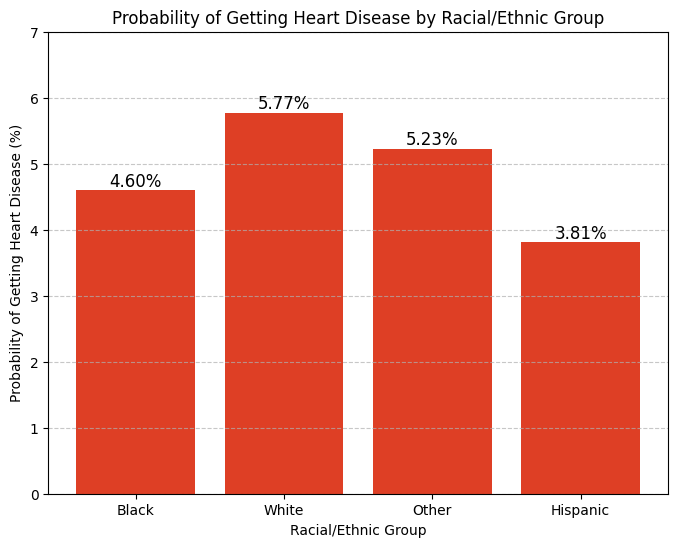

In [ ]:
import matplotlib.pyplot as plt

# Define the racial/ethnic groups and their corresponding probabilities
groups = ["Black", "White", "Other", "Hispanic"]
probabilities = [4.60, 5.77, 5.23, 3.81]

# Define the color
bar_color = '#DE3F25'

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(groups, probabilities, color=bar_color)
plt.xlabel("Racial/Ethnic Group")
plt.ylabel("Probability of Getting Heart Disease (%)")
plt.title("Probability of Getting Heart Disease by Racial/Ethnic Group")
plt.ylim(0, 7)  # Adjust the y-axis limit if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with percentages
for bar, percentage in zip(bars, probabilities):
    plt.annotate(f'{percentage:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center',
                 fontsize=12,
                 color='black')

plt.show()

Probability of getting heart disease if you have angina: 0.00%


In [ ]:
# Race Ethnicity Category
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
race_counts = df["RaceEthnicityCategory"].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=race_counts.index,
    values=race_counts,
    hole=0.35,
    textinfo='label+percent',
    rotation=-45,
    marker=dict(colors=colours)
)])

fig.update_layout(
    title_text="Race Ethnicity Category Distribution",
    title_x=0.5,  # Center the title
    height=400,  # Adjust the height as needed
    font=dict(size=14),
    showlegend=False
)

fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
import plotly.graph_objects as go

# Set up your data
colours = ['#4285f4', '#ea4335']
covid_percentage = 70.41
no_covid_percentage = 100 - covid_percentage

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=['Covid', 'No Covid'],
    values=[covid_percentage, no_covid_percentage],
    hole=0.35,
    textinfo='label+percent',
    rotation=-45,
    marker=dict(colors=colours)
)])

# Adjust layout
fig.update_layout(
    title_text="Covid Positive Cases",
    title_x=0.5,
    height=400,
    font=dict(size=14),
    showlegend=False
)

# Show the plot
fig.show()

In [ ]:
# Race Ethnicity Category
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
race_counts = df["CovidPos2"].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=race_counts.index,
    values=race_counts,
    hole=0.35,
    textinfo='label+percent',
    rotation=-45,
    marker=dict(colors=colours)
)])

fig.update_layout(
    title_text="covidpos2",
    title_x=0.5,  # Center the title
    height=400,  # Adjust the height as needed
    font=dict(size=14),
    showlegend=False
)

fig.show()

In [ ]:
# Race Ethnicity Category
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
race_counts = df["PhysicalActivities"].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=race_counts.index,
    values=race_counts,
    hole=0.35,
    textinfo='label+percent',
    rotation=-45,
    marker=dict(colors=colours)
)])

fig.update_layout(
    title_text="Physical Health Distribution",
    title_x=0.5,  # Center the title
    height=400,  # Adjust the height as needed
    font=dict(size=14),
    showlegend=False
)

fig.show()

Now for ECigarreteUsage

In [ ]:
# Assuming you have a DataFrame df with the column "ECigaretteUsage"

# Define a mapping of existing values to the desired categories
category_mapping = {
    "Never used e-cigarettes in my entire life": "Never Used",
    "Use them some days": "Yes",
    "Not at all (right now)": "Never Used",
    "Use them every day": "Yes"
}

# Use the mapping to create a new column with categories
df['ECigaretteUsage2'] = df['ECigaretteUsage'].map(category_mapping)


In [ ]:
# ECigaretteUsage2
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
race_counts = df["ECigaretteUsage2"].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=race_counts.index,
    values=race_counts,
    hole=0.35,
    textinfo='label+percent',
    rotation=-45,
    marker=dict(colors=colours)
)])

fig.update_layout(
    title_text="ECigaretteUsage2",
    title_x=0.5,  # Center the title
    height=400,  # Adjust the height as needed
    font=dict(size=14),
    showlegend=False
)

fig.show()

In [ ]:
# ECigaretteUsage2
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
race_counts = df["HadStroke"].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=race_counts.index,
    values=race_counts,
    hole=0.35,
    textinfo='label+percent',
    rotation=-45,
    marker=dict(colors=colours)
)])

fig.update_layout(
    title_text="HadStroke",
    title_x=0.5,  # Center the title
    height=400,  # Adjust the height as needed
    font=dict(size=14),
    showlegend=False
)

fig.show()

Now for SmokerStatus

In [ ]:
import pandas as pd

# Assuming you have a DataFrame df with the column "SmokerStatus"

# Define a mapping of existing values to the desired categories
category_mapping = {
    "Never smoked": "Never Smoked",
    "Former smoker": "Former Smoker",
    "Current smoker - now smokes every day": "Smoker",
    "Current smoker - now smokes some days": "Smoker"
}

# Use the mapping to create a new column with categories
df['SmokerStatus2'] = df['SmokerStatus'].map(category_mapping)

In [ ]:
# Assuming you have a DataFrame df with the column "SmokerStatus"

# Define a mapping of existing values to the desired categories
category_mapping = {
    "Never smoked": "Never Smoked",
    "Former smoker": "Smoker",
    "Current smoker - now smokes every day": "Smoker",
    "Current smoker - now smokes some days": "Smoker"
}

# Use the mapping to create a new column with categories
df['SmokerStatus3'] = df['SmokerStatus'].map(category_mapping)

Now for HadDiabetes

In [ ]:
# Assuming you have a DataFrame df with the column "HadDiabetes"

# Define a mapping of existing values to the desired categories
category_mapping = {
    "Yes": "Yes",
    "No": "No",
    "No, pre-diabetes or borderline diabetes": "Pre-diabetes",
    "Yes, but only during pregnancy (female)": "Pregnancy-Diabetes"
}

# Use the mapping to create a new column with categories
df['HadDiabetes2'] = df['HadDiabetes'].map(category_mapping)


In [ ]:
# Filter the dataset for individuals with angina
angina_df = df[df['HadDiabetes2'] == "Yes"]

# Calculate the probability of having heart disease among individuals with angina
probability_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "Yes").mean() * 100

print(f"Probability of GETTING heart disease if you have COPD: {probability_heart_disease_with_angina:.2f}%")


# Filter the dataset for individuals with angina
angina_df = df[df['HadDiabetes2'] == "Yes"]

# Calculate the probability of not having heart disease among individuals with angina
probability_no_heart_disease_with_angina = (angina_df['HadHeartAttack'] == "No").mean() * 100

print(f"Probability of NOT getting heart disease if you have COPD: {probability_no_heart_disease_with_angina:.2f}%")

Probability of GETTING heart disease if you have COPD: 13.76%
Probability of NOT getting heart disease if you have COPD: 86.24%


Now for TetanusLast10Tdap

In [ ]:
# Define a mapping of existing values to the desired categories
category_mapping = {
    "No, did not receive any tetanus shot in the past 10 years": "No",
    "Yes, received tetanus shot, but not Tdap": "Yes",
    "Yes, received Tdap": "Yes",
    "Yes, received tetanus shot but not sure what type": "Yes"
}

# Use the mapping to create a new column with categories
df['TetanusLast10Tdap2'] = df['TetanusLast10Tdap'].map(category_mapping)


Now CovidPos

In [ ]:
category_mapping = {
    "Yes": "Yes",
    "No": "No",
    "Tested positive using home test without a health professional": "Yes Rapid Test"
}

# Use the mapping to create a new column with categories
df['CovidPos2'] = df['CovidPos'].map(category_mapping)

Now for LastCheckupTime

In [ ]:
category_mapping = {
    "Within past year (anytime less than 12 months ago)": "This Year",
    "5 or more years ago": "More than 5 Years ago",
    "Within past 2 years (1 year but less than 2 years ago)": "Last Year",
    "Within past 5 years (2 years but less than 5 years ago)": "Two Years ago"
}

# Use the mapping to create a new column with categories
df['LastCheckupTime2'] = df['LastCheckupTime'].map(category_mapping)


In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'AgeNumeric',
       'PhysicalHealthCategories', 'MentalHealthCategories',
       'SleepHourCategories', 'BMI2', 'BMI3', 'ECigaretteUsage2',
       'SmokerStatus2', 'SmokerStatus3', 'HadDiabetes2', 'TetanusLa

Now we can divide the variables in between Categorical and Continous

We now check for missing data, the output below that there are no missing values (null values) in any of the columns because all the counts are zeros.

In [ ]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

Now, we will see the Column Statistics for our continous features

In [ ]:
df.describe()[1:][['BMI','PhysicalHealthDays','MentalHealthDays', 'AgeNumeric', 'HeightInMeters','WeightInKilograms','SleepHours']].T.style.background_gradient(cmap='Blues')

KeyError: ignored

We could also have duplicated information in our data

In [ ]:
df.duplicated().sum()

9

This indicates that we dont have any duplicates rows in the Dataframe

If we did, that means that we have to remove the duplicates by dropping them

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print('Continuous Columns')
df.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


In [ ]:
print('\nCategorical Columns\n')
df.select_dtypes(include=['O']).nunique()


Categorical Columns



State                        54
Sex                           2
GeneralHealth                 5
LastCheckupTime               4
PhysicalActivities            2
RemovedTeeth                  4
HadHeartAttack                2
HadAngina                     2
HadStroke                     2
HadAsthma                     2
HadSkinCancer                 2
HadCOPD                       2
HadDepressiveDisorder         2
HadKidneyDisease              2
HadArthritis                  2
HadDiabetes                   4
DeafOrHardOfHearing           2
BlindOrVisionDifficulty       2
DifficultyConcentrating       2
DifficultyWalking             2
DifficultyDressingBathing     2
DifficultyErrands             2
SmokerStatus                  4
ECigaretteUsage               4
ChestScan                     2
RaceEthnicityCategory         4
AgeCategory                  13
AlcoholDrinkers               2
HIVTesting                    2
FluVaxLast12                  2
PneumoVaxEver                 2
TetanusL

# EDA

## **Pie charts for all of our variables**

In [ ]:
# Sex
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
sex_counts = df["Sex"].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=sex_counts.index,
    values=sex_counts,
    hole=0.35,
    textinfo='label+percent',
    rotation=-45,
    marker=dict(colors=colours)
)])

fig.update_layout(
    title_text="Gender",
    title_x=0.5,  # Center the title
    height=400,  # Adjust the height as needed
    font=dict(size=14),
    showlegend=False
)

fig.show()


In [ ]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("Sex", "GeneralHealth", "PhysicalHealthCategories", "MentalHealthCategories",
    "LastCheckupTime2", "PhysicalActivities", "SleepHours",
    "HadHeartAttack", "HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer",
    "HadCOPD", "HadDepressiveDisorder", "HadKidneyDisease",
    "HadDiabetes", "SmokerStatus", "ECigaretteUsage2", "ChestScan",
    "RaceEthnicityCategory", "AgeCategory",
    "BMI", "AlcoholDrinkers", "FluVaxLast12", "PneumoVaxEver",
    "TetanusLast10Tdap", "HighRiskLastYear", "CovidPos"),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

#Sex
fig.add_trace(go.Pie(labels=np.array(df["Sex"].value_counts().index),
                     values=[x for x in df["Sex"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

#GeneralHealth
fig.add_trace(go.Pie(labels=np.array(df["GeneralHealth"].value_counts().index),
                     values=[x for x in df["GeneralHealth"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=2)

#PhysicalHealthCategories
fig.add_trace(go.Pie(labels=np.array(df["PhysicalHealthCategories"].value_counts().index),
                     values=[x for x in df["PhysicalHealthCategories"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

#MentalHealthCategories
fig.add_trace(go.Pie(labels=np.array(df["MentalHealthCategories"].value_counts().index),
                     values=[x for x in df["MentalHealthCategories"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

#LastCheckupTime
fig.add_trace(go.Pie(labels=np.array(df["LastCheckupTime2"].value_counts().index),
                     values=[x for x in df["LastCheckupTime2"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=1)

#PhysicalActivities
fig.add_trace(go.Pie(labels=np.array(df["PhysicalActivities"].value_counts().index),
                     values=[x for x in df["PhysicalActivities"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=2)

#SleepHourCategories
fig.add_trace(go.Pie(labels=np.array(df["SleepHourCategories"].value_counts().index),
                     values=[x for x in df["SleepHourCategories"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

#HadHeartAttack
fig.add_trace(go.Pie(labels=np.array(df["HadHeartAttack"].value_counts().index),
                     values=[x for x in df["HadHeartAttack"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=2)

#HadAngina
fig.add_trace(go.Pie(labels=np.array(df["HadAngina"].value_counts().index),
                     values=[x for x in df["HadAngina"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

#HadStroke
fig.add_trace(go.Pie(labels=np.array(df["HadStroke"].value_counts().index),
                     values=[x for x in df["HadStroke"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=2)

#HadHeartAttack
fig.add_trace(go.Pie(labels=np.array(df["HadHeartAttack"].value_counts().index),
                     values=[x for x in df["HadHeartAttack"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

#HadSkinCancer
fig.add_trace(go.Pie(labels=np.array(df["HadSkinCancer"].value_counts().index),
                     values=[x for x in df["HadSkinCancer"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

#HadCOPD
fig.add_trace(go.Pie(labels=np.array(df["HadCOPD"].value_counts().index),
                     values=[x for x in df["HadCOPD"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)
#HadDepressiveDisorder
fig.add_trace(go.Pie(labels=np.array(df["HadDepressiveDisorder"].value_counts().index),
                     values=[x for x in df["HadDepressiveDisorder"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=2)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

In [ ]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=( "HadDiabetes2",
    "SmokerStatus2", "ECigaretteUsage2", "ChestScan",
    "RaceEthnicityCategory", "AlcoholDrinkers", "FluVaxLast12", "PneumoVaxEver",
    "TetanusLast10Tdap2", "HighRiskLastYear", "CovidPos2"),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

#HadDiabetes
fig.add_trace(go.Pie(labels=np.array(df["HadDiabetes2"].value_counts().index),
                     values=[x for x in df["HadDiabetes2"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

#SmokerStatus
fig.add_trace(go.Pie(labels=np.array(df["SmokerStatus2"].value_counts().index),
                     values=[x for x in df["SmokerStatus2"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=2)

#ECigaretteUsage
fig.add_trace(go.Pie(labels=np.array(df["ECigaretteUsage2"].value_counts().index),
                     values=[x for x in df["ECigaretteUsage2"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

#ChestScan
fig.add_trace(go.Pie(labels=np.array(df["ChestScan"].value_counts().index),
                     values=[x for x in df["ChestScan"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

#RaceEthnicityCategory
fig.add_trace(go.Pie(labels=np.array(df["RaceEthnicityCategory"].value_counts().index),
                     values=[x for x in df["RaceEthnicityCategory"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=1)

#AlcoholDrinkers
fig.add_trace(go.Pie(labels=np.array(df["AlcoholDrinkers"].value_counts().index),
                     values=[x for x in df["AlcoholDrinkers"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=2)

#FluVaxLast12
fig.add_trace(go.Pie(labels=np.array(df["FluVaxLast12"].value_counts().index),
                     values=[x for x in df["FluVaxLast12"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

#PneumoVaxEver
fig.add_trace(go.Pie(labels=np.array(df["PneumoVaxEver"].value_counts().index),
                     values=[x for x in df["PneumoVaxEver"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=2)

#TetanusLast10Tdap
fig.add_trace(go.Pie(labels=np.array(df["TetanusLast10Tdap2"].value_counts().index),
                     values=[x for x in df["TetanusLast10Tdap2"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

#HighRiskLastYear
fig.add_trace(go.Pie(labels=np.array(df["HighRiskLastYear"].value_counts().index),
                     values=[x for x in df["HighRiskLastYear"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=2)

#CovidPos
fig.add_trace(go.Pie(labels=np.array(df["CovidPos2"].value_counts().index),
                     values=[x for x in df["CovidPos2"].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

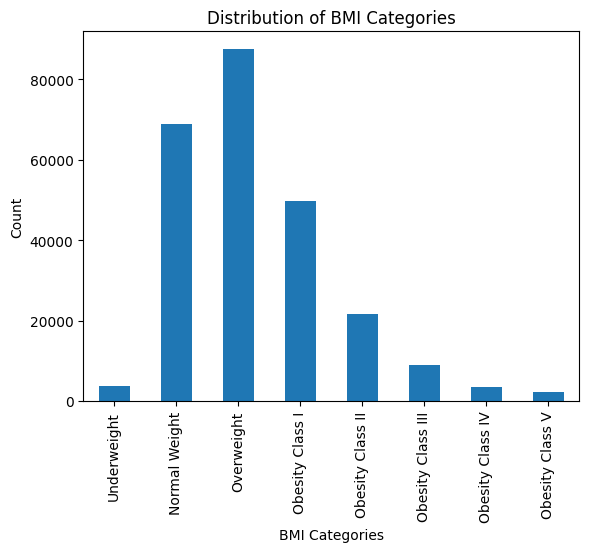

In [ ]:

# Group the data by BMICategories and count the occurrences
bmi_category_counts = df['BMI2'].value_counts()

# Sort the categories in the desired order if needed
bmi_category_counts = bmi_category_counts.reindex(['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III', 'Obesity Class IV', 'Obesity Class V'])

# Create a bar graph
bmi_category_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')

# Display the plot
plt.show()

## **Kernel Density Estimation Plots for SleepTime, MentalHealth and PhysicalHealth**

<ipython-input-37-3d9e82c8e4e1>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-3d9e82c8e4e1>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




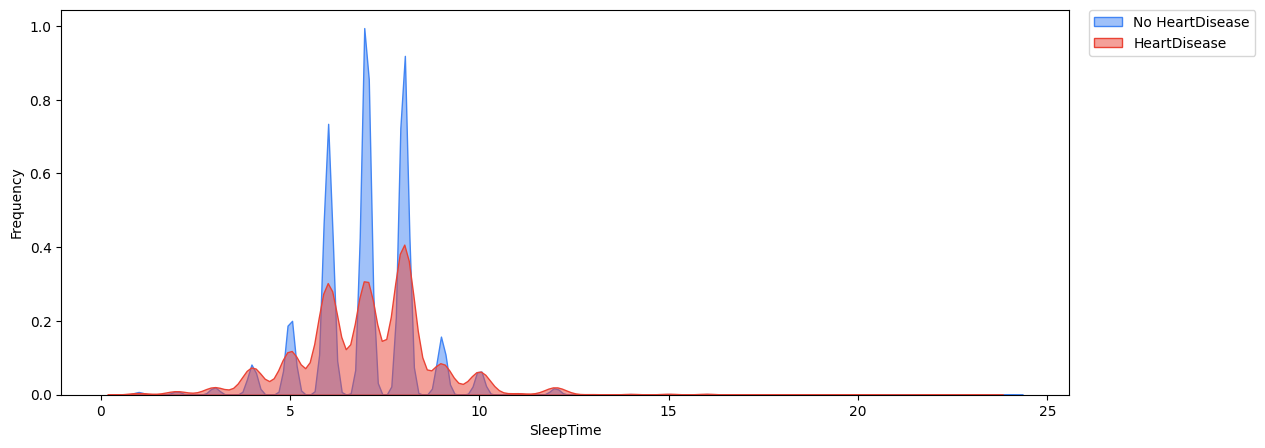

<ipython-input-37-3d9e82c8e4e1>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-3d9e82c8e4e1>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




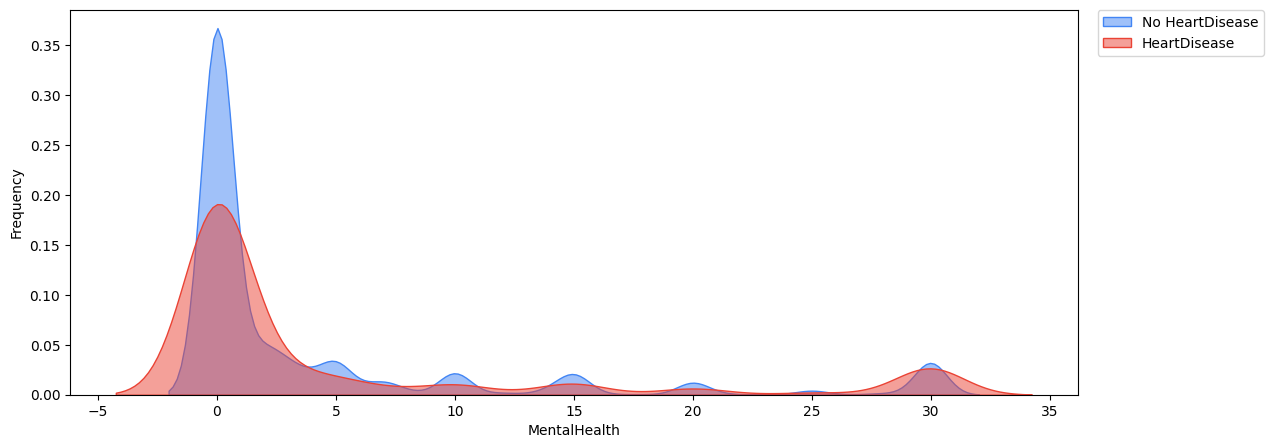

<ipython-input-37-3d9e82c8e4e1>:21: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-3d9e82c8e4e1>:22: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




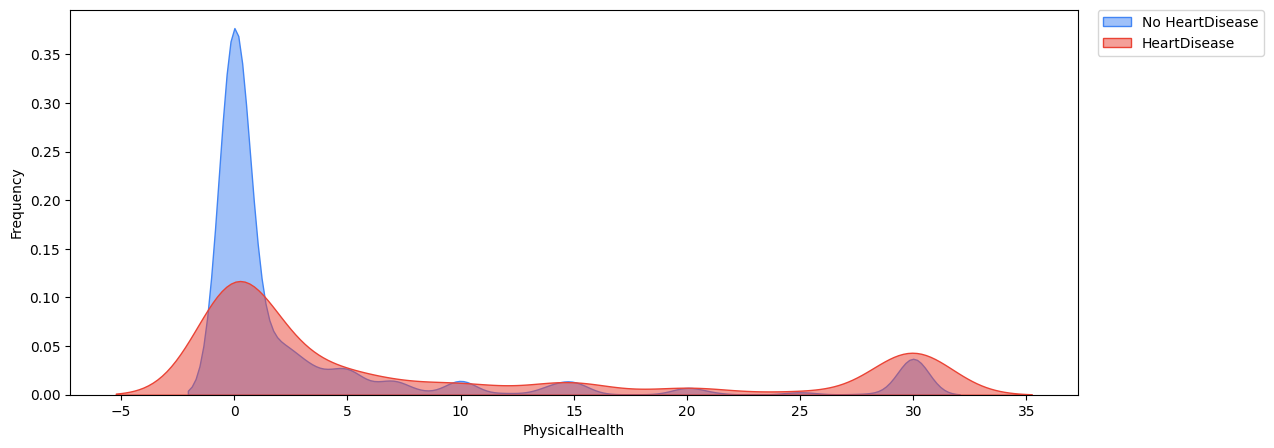

In [ ]:

#Sleep Time
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HadHeartAttack"]=='No']["SleepHours"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HadHeartAttack"]=='Yes']["SleepHours"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

#Mental Health
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HadHeartAttack"]=='No']["MentalHealthDays"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HadHeartAttack"]=='Yes']["MentalHealthDays"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

#Physical Health
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HadHeartAttack"]=='No']["PhysicalHealthDays"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HadHeartAttack"]=='Yes']["PhysicalHealthDays"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()



Kernel Density Estimation Plots for the three diseases in the DataSet:

*   Heart Disease
*   Kidney Disease
*   Skin Cancer







<ipython-input-38-c9face159841>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-c9face159841>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-c9face159841>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-c9face159841>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-c9face159841>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-c9face159841

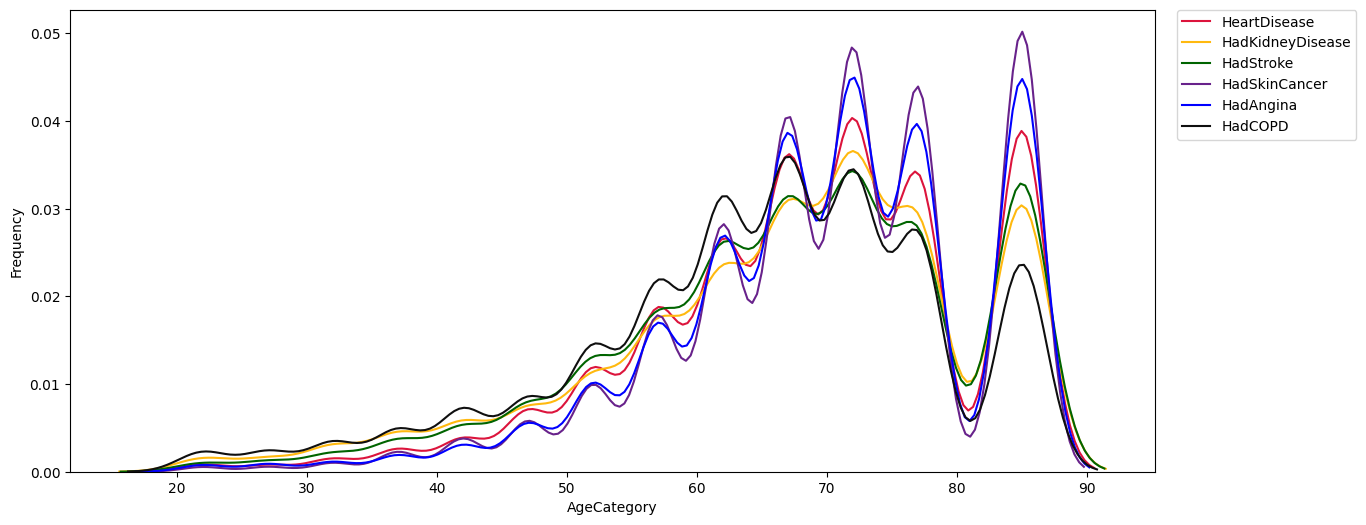

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HadHeartAttack"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#DC143C", label="HeartDisease", ax = ax) #red
sns.kdeplot(df[df["HadKidneyDisease"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#FFB90F", label="HadKidneyDisease", ax = ax) #yellow
sns.kdeplot(df[df["HadStroke"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#006400", label="HadStroke", ax = ax) #darkgreen
sns.kdeplot(df[df["HadSkinCancer"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#68228B", label="HadSkinCancer", ax = ax) #purp
sns.kdeplot(df[df["HadAngina"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#0000FF", label="HadAngina", ax = ax) #blue
sns.kdeplot(df[df["HadCOPD"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#0F0F0F", label="HadCOPD", ax = ax) #black
sns.kdeplot(df[df["BMI2"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#0F0F0F", label="BMI2", ax = ax) #black


ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Now we can see with other conditions how Heart Disease does not correlate


<ipython-input-39-a9c8436bed67>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-39-a9c8436bed67>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.




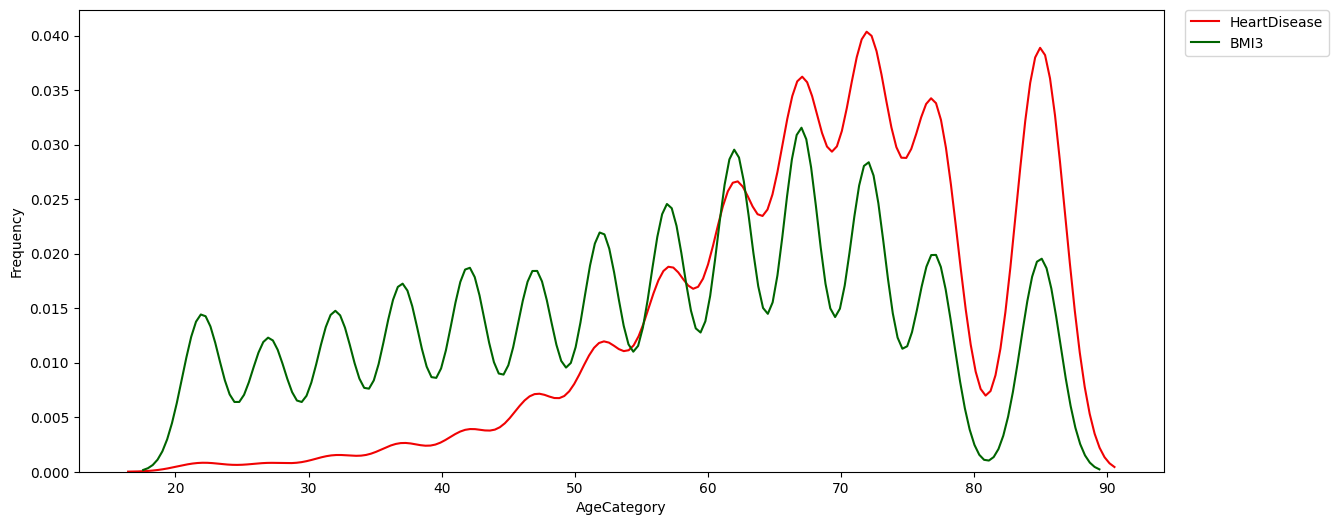

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

# Filter the DataFrame for "HadHeartAttack" and "BMI3" categories
heart_attack_data = df[df["HadHeartAttack"] == 'Yes']

# Plot KDE for "AgeNumeric" for HeartDisease
sns.kdeplot(heart_attack_data["AgeNumeric"], alpha=1, shade=False, color="#f00203", label="HeartDisease", ax=ax)

# Plot KDE for "AgeNumeric" for BMI3
bmi3_data = df[df["BMI3"].notna()]  # Filter out NaN values, if any
sns.kdeplot(bmi3_data["AgeNumeric"], alpha=1, shade=False, color="#006400", label="BMI3", ax=ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()

<ipython-input-40-8d65fa8e26fe>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-40-8d65fa8e26fe>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-40-8d65fa8e26fe>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.




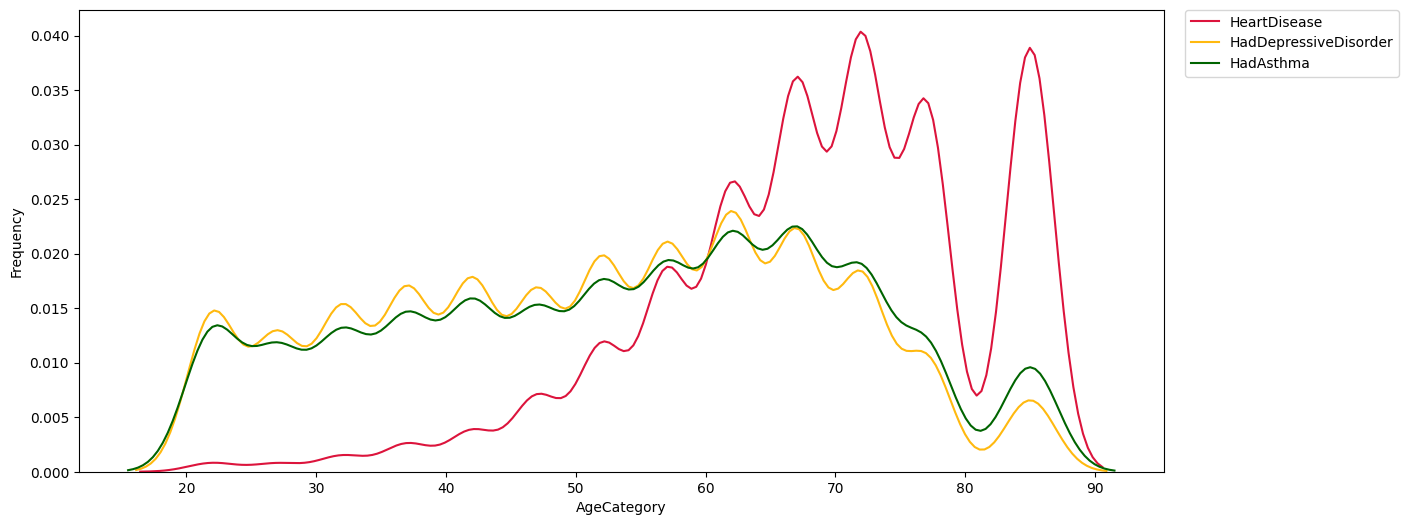

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HadHeartAttack"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#DC143C", label="HeartDisease", ax = ax) #red
sns.kdeplot(df[df["HadDepressiveDisorder"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#FFB90F", label="HadDepressiveDisorder", ax = ax) #yellow
sns.kdeplot(df[df["HadAsthma"]=='Yes']["AgeNumeric"], alpha=1,shade = False, color="#006400", label="HadAsthma", ax = ax) #darkgreen

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

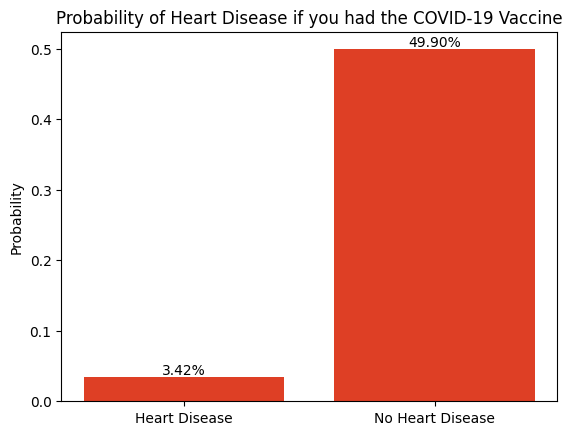

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the joint probability of having a heart attack and receiving a flu vaccine
joint_probability_ha_and_flu = (df[(df['HadHeartAttack'] == 'Yes') & (df['FluVaxLast12'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the joint probability of not having a heart attack and receiving a flu vaccine
joint_probability_no_ha_and_flu = (df[(df['HadHeartAttack'] == 'No') & (df['FluVaxLast12'] == 'Yes')].shape[0] / df.shape[0])

# Create a bar chart with the specified color
categories = ['Heart Disease', 'No Heart Disease']
probabilities = [joint_probability_ha_and_flu, joint_probability_no_ha_and_flu]

# Set the color to #DE3F25
color = '#DE3F25'

# Create the bar chart with the specified color
plt.bar(categories, probabilities, color=color)
plt.title('Probability of Heart Disease if you had the COVID-19 Vaccine')
plt.ylabel('Probability')

# Annotate the bars with percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()


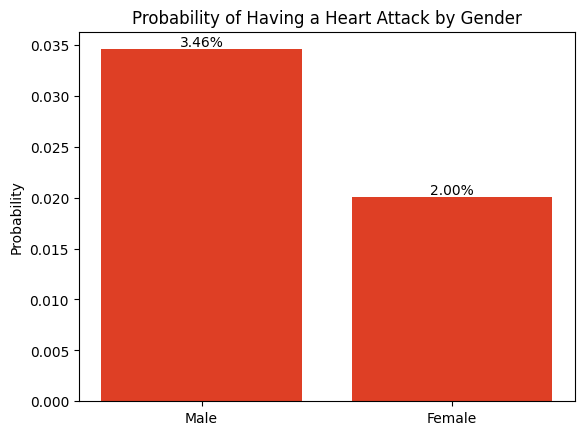

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of being male
male_probability = (df[df['Sex'] == 'Male'].shape[0] / df.shape[0])

# Calculate the probability of being female
female_probability = (df[df['Sex'] == 'Female'].shape[0] / df.shape[0])

# Calculate the joint probability of being male and having a heart attack
male_and_heart_attack_probability = (df[(df['Sex'] == 'Male') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the joint probability of being female and having a heart attack
female_and_heart_attack_probability = (df[(df['Sex'] == 'Female') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df.shape[0])

# Create a bar chart with the specified color
categories = ['Male', 'Female']
probabilities = [male_and_heart_attack_probability, female_and_heart_attack_probability]

# Set the color to #DE3F25
color = '#DE3F25'

# Create the bar chart
plt.bar(categories, probabilities, color=color)
plt.title('Probability of Having a Heart Attack by Gender')
plt.ylabel('Probability')

# Annotate the bars with percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()


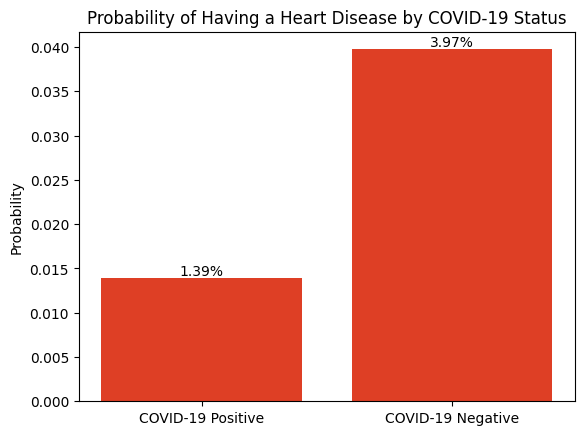

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of having a heart attack
heart_attack_probability = (df[df['HadHeartAttack'] == 'Yes'].shape[0] / df.shape[0])

# Calculate the probability of being COVID-19 positive
covid_positive_probability = (df[df['CovidPos'] == 'Yes'].shape[0] / df.shape[0])

# Calculate the joint probability of having a heart attack and being COVID-19 positive
heart_attack_and_covid_positive_probability = (df[(df['HadHeartAttack'] == 'Yes') & (df['CovidPos'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the joint probability of having a heart attack and being COVID-19 negative
heart_attack_and_covid_negative_probability = (df[(df['HadHeartAttack'] == 'Yes') & (df['CovidPos'] == 'No')].shape[0] / df.shape[0])

# Create a bar chart
categories = ['COVID-19 Positive', 'COVID-19 Negative']
probabilities = [heart_attack_and_covid_positive_probability, heart_attack_and_covid_negative_probability]

# Set the colors for the bars
colors = ['#DE3F25', '#DE3F25']

# Create the bar chart
plt.bar(categories, probabilities, color=colors)
plt.title('Probability of Having a Heart Disease by COVID-19 Status')
plt.ylabel('Probability')

# Annotate the bars with percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()


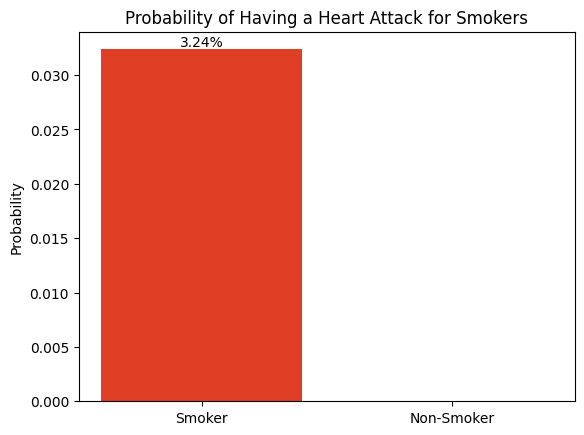

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns "SmokerStatus3" and "HadHeartAttack"

# Calculate the probability of being a smoker
smoker_probability = (df[df['SmokerStatus3'] == 'Smoker'].shape[0] / df.shape[0])

# Calculate the joint probability of being a smoker and having a heart attack
smoker_and_heart_attack_probability = (df[(df['SmokerStatus3'] == 'Smoker') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df.shape[0])

# Create a bar chart with the specified color
categories = ['Smoker', 'Non-Smoker']
probabilities = [smoker_and_heart_attack_probability, 0]  # Assuming 0% probability for non-smokers

# Set the color to #DE3F25
color = '#DE3F25'

# Create the bar chart
plt.bar(categories, probabilities, color=color)
plt.title('Probability of Having a Heart Attack for Smokers')
plt.ylabel('Probability')

# Annotate the bar with the smoker percentage
plt.text(0, smoker_and_heart_attack_probability, f"{smoker_and_heart_attack_probability*100:.2f}%", ha='center', va='bottom')

plt.show()



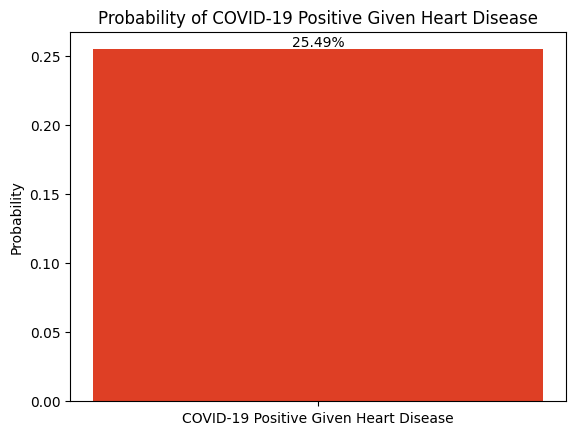

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of having heart disease (a heart attack)
heart_disease_probability = (df[df['HadHeartAttack'] == 'Yes'].shape[0] / df.shape[0])

# Calculate the joint probability of having heart disease and being COVID-19 positive
heart_disease_and_covid_positive_probability = (df[(df['HadHeartAttack'] == 'Yes') & (df['CovidPos'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the probability of being COVID-19 positive if you have heart disease
covid_positive_given_heart_disease_probability = heart_disease_and_covid_positive_probability / heart_disease_probability

# Create a bar chart
categories = ['COVID-19 Positive Given Heart Disease']
probabilities = [covid_positive_given_heart_disease_probability]

# Set the color
color = '#DE3F25'

# Create the bar chart
plt.bar(categories, probabilities, color=color)
plt.title('Probability of COVID-19 Positive Given Heart Disease')
plt.ylabel('Probability')

# Annotate the bar with the percentage
plt.text(0, covid_positive_given_heart_disease_probability, f"{covid_positive_given_heart_disease_probability*100:.2f}%", ha='center', va='bottom')

plt.show()


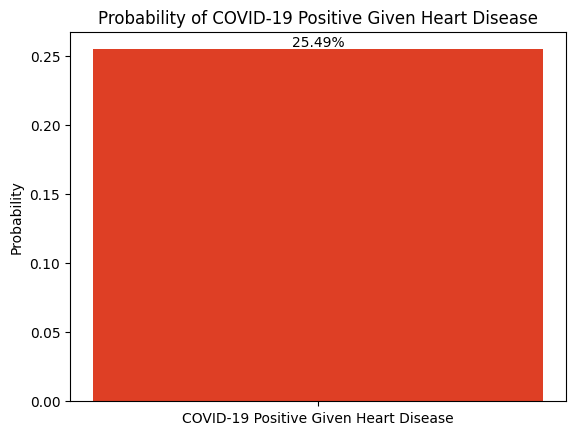

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of having heart disease (a heart attack)
heart_disease_probability = (df[df['HadHeartAttack'] == 'Yes'].shape[0] / df.shape[0])

# Calculate the joint probability of having heart disease and being COVID-19 positive
heart_disease_and_covid_positive_probability = (df[(df['HadHeartAttack'] == 'Yes') & (df['CovidPos'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the probability of being COVID-19 positive if you have heart disease
covid_positive_given_heart_disease_probability = heart_disease_and_covid_positive_probability / heart_disease_probability

# Create a bar chart
categories = ['COVID-19 Positive Given Heart Disease']
probabilities = [covid_positive_given_heart_disease_probability]

# Set the color
color = '#DE3F25'

# Create the bar chart
plt.bar(categories, probabilities, color=color)
plt.title('Probability of COVID-19 Positive Given Heart Disease')
plt.ylabel('Probability')

# Annotate the bar with the percentage
plt.text(0, covid_positive_given_heart_disease_probability, f"{covid_positive_given_heart_disease_probability*100:.2f}%", ha='center', va='bottom')

plt.show()


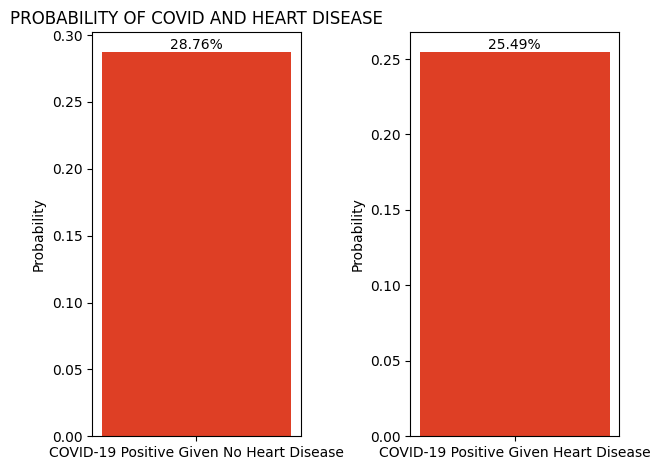

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of not having heart disease (not having a heart attack)
no_heart_disease_probability = (df[df['HadHeartAttack'] == 'No'].shape[0] / df.shape[0])

# Calculate the joint probability of not having heart disease and being COVID-19 positive
no_heart_disease_and_covid_positive_probability = (df[(df['HadHeartAttack'] == 'No') & (df['CovidPos'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the probability of being COVID-19 positive if you do not have heart disease
covid_positive_given_no_heart_disease_probability = no_heart_disease_and_covid_positive_probability / no_heart_disease_probability

# Calculate the probability of having heart disease (a heart attack)
heart_disease_probability = (df[df['HadHeartAttack'] == 'Yes'].shape[0] / df.shape[0])

# Calculate the joint probability of having heart disease and being COVID-19 positive
heart_disease_and_covid_positive_probability = (df[(df['HadHeartAttack'] == 'Yes') & (df['CovidPos'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the probability of being COVID-19 positive if you have heart disease
covid_positive_given_heart_disease_probability = heart_disease_and_covid_positive_probability / heart_disease_probability

# Create a bar chart for COVID-19 Positive Given No Heart Disease
plt.subplot(121)
categories_no_heart = ['COVID-19 Positive Given No Heart Disease']
probabilities_no_heart = [covid_positive_given_no_heart_disease_probability]
color = '#DE3F25'

plt.bar(categories_no_heart, probabilities_no_heart, color=color)
plt.title('PROBABILITY OF COVID AND HEART DISEASE')
plt.ylabel('Probability')
plt.text(0, covid_positive_given_no_heart_disease_probability, f"{covid_positive_given_no_heart_disease_probability*100:.2f}%", ha='center', va='bottom')

# Create a bar chart for COVID-19 Positive Given Heart Disease
plt.subplot(122)
categories_heart = ['COVID-19 Positive Given Heart Disease']
probabilities_heart = [covid_positive_given_heart_disease_probability]

plt.bar(categories_heart, probabilities_heart, color=color)
plt.title('')
plt.ylabel('Probability')
plt.text(0, covid_positive_given_heart_disease_probability, f"{covid_positive_given_heart_disease_probability*100:.2f}%", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of being a female and getting heart disease
female_heart_disease_probability = (df[(df['Sex'] == 'Female') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df[df['Sex'] == 'Female'].shape[0])

# Calculate the probability of being a male and getting heart disease
male_heart_disease_probability = (df[(df['Sex'] == 'Male') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df[df['Sex'] == 'Male'].shape[0])

print("Probability of being a female and getting heart disease:", female_heart_disease_probability)
print("Probability of being a male and getting heart disease:", male_heart_disease_probability)

Probability of being a female and getting heart disease: 0.03858822793030334
Probability of being a male and getting heart disease: 0.07193070018864572


In [ ]:
# Assuming you have a DataFrame df with the column "SmokerStatus"

# Define a mapping of existing values to the desired categories
category_mapping = {
    "Never smoked": "Never Smoked",
    "Former smoker": "Smoker",
    "Current smoker - now smokes every day": "Smoker",
    "Current smoker - now smokes some days": "Smoker"
}

# Use the mapping to create a new column with categories
df['SmokerStatus3'] = df['SmokerStatus'].map(category_mapping)

In [ ]:
smoker_probability = (df[df['SmokerStatus3'] == 'Smoker'].shape[0] / df.shape[0])

print("Probability of being a smoker:", smoker_probability)

Probability of being a smoker: 0.3994967929697344


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of getting a heart disease
heart_disease_probability = (df[df['HadHeartAttack'] == 'Yes'].shape[0] / df.shape[0])

print("Probability of getting a heart disease:", heart_disease_probability)


Probability of getting a heart disease: 0.054608937412101356


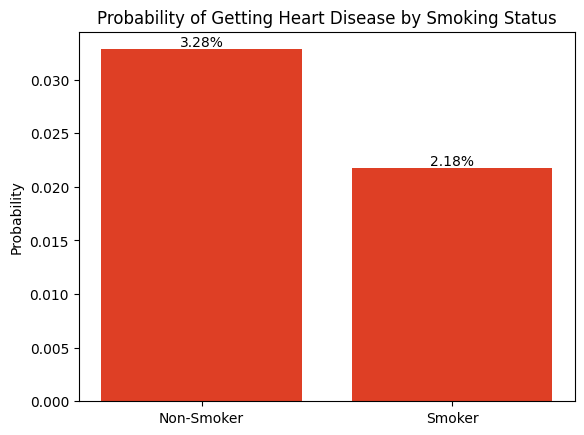

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Probabilities
non_smoker_heart_disease_probability = 0.03284
smoker_heart_disease_probability = 0.02177

# Set the categories and probabilities
categories = ['Non-Smoker', 'Smoker']
probabilities = [non_smoker_heart_disease_probability, smoker_heart_disease_probability]

# Set the colors
colors = ['#DE3F25', '#DE3F25']

# Create the bar chart
plt.bar(categories, probabilities, color=colors)
plt.title('Probability of Getting Heart Disease by Smoking Status')
plt.ylabel('Probability')

# Annotate the bars with the percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()


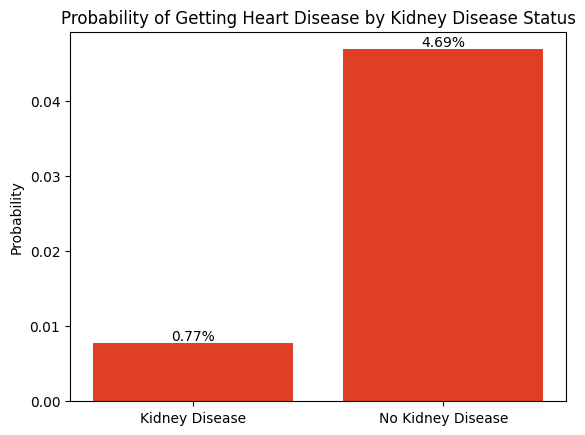

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the probability of having a kidney disease and getting a heart disease
kidney_heart_probability = (df[(df['HadKidneyDisease'] == 'Yes') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the probability of not having a kidney disease and getting a heart disease
no_kidney_heart_probability = (df[(df['HadKidneyDisease'] == 'No') & (df['HadHeartAttack'] == 'Yes')].shape[0] / df.shape[0])

# Create a bar chart
categories = ['Kidney Disease', 'No Kidney Disease']
probabilities = [kidney_heart_probability, no_kidney_heart_probability]

# Set the colors
colors = ['#DE3F25', '#DE3F25']

# Create the bar chart
plt.bar(categories, probabilities, color=colors)
plt.title('Probability of Getting Heart Disease by Kidney Disease Status')
plt.ylabel('Probability')

# Annotate the bars with the percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob, f"{prob*100:.2f}%", ha='center', va='bottom')

plt.show()


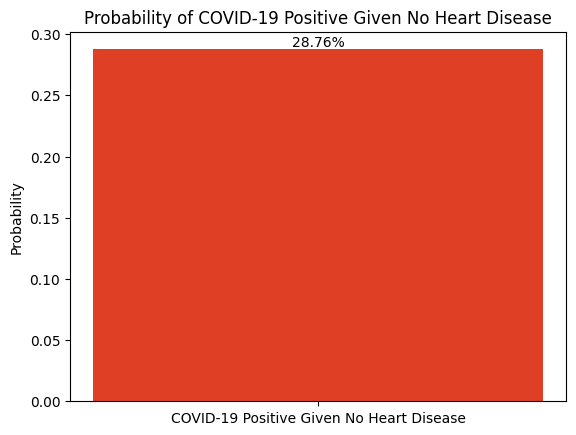

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the probability of not having heart disease (not having a heart attack)
no_heart_disease_probability = (df[df['HadHeartAttack'] == 'No'].shape[0] / df.shape[0])

# Calculate the joint probability of not having heart disease and being COVID-19 positive
no_heart_disease_and_covid_positive_probability = (df[(df['HadHeartAttack'] == 'No') & (df['CovidPos'] == 'Yes')].shape[0] / df.shape[0])

# Calculate the probability of being COVID-19 positive if you do not have heart disease
covid_positive_given_no_heart_disease_probability = no_heart_disease_and_covid_positive_probability / no_heart_disease_probability

# Create a bar chart
categories = ['COVID-19 Positive Given No Heart Disease']
probabilities = [covid_positive_given_no_heart_disease_probability]

# Set the color
color = '#DE3F25'

# Create the bar chart
plt.bar(categories, probabilities, color=color)
plt.title('Probability of COVID-19 Positive Given No Heart Disease')
plt.ylabel('Probability')

# Annotate the bar with the percentage
plt.text(0, covid_positive_given_no_heart_disease_probability, f"{covid_positive_given_no_heart_disease_probability*100:.2f}%", ha='center', va='bottom')

plt.show()


Map Geographical

In [ ]:
jsonURL = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
with urlopen(jsonURL) as response:
    counties = json.load(response)

In [ ]:
!pip install geopandas

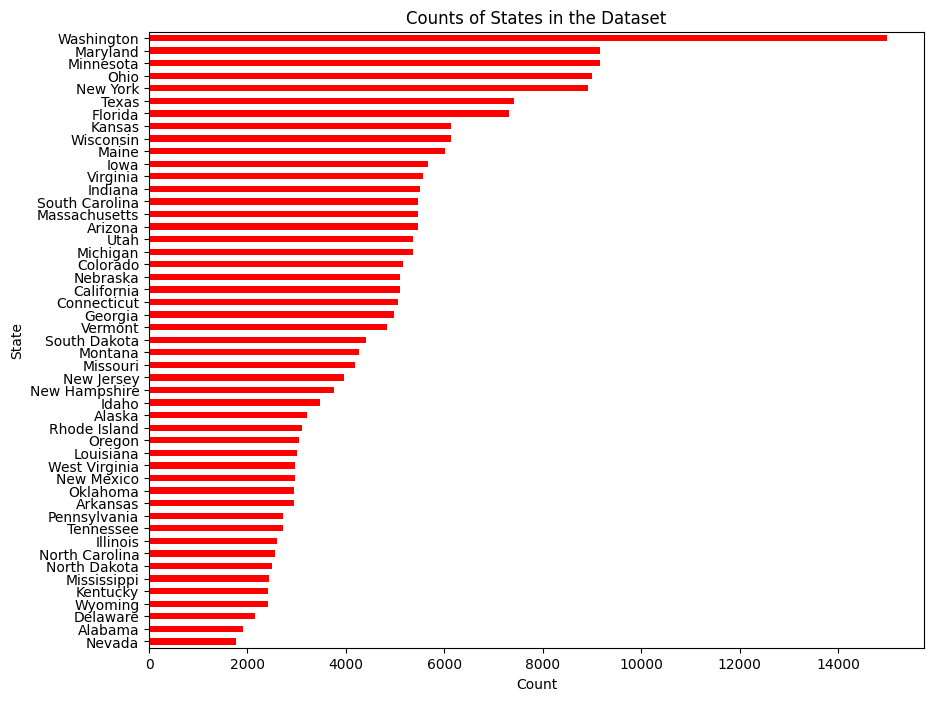

In [ ]:
# Count the occurrences of each state
state_counts = df['State'].value_counts()

# Remove specified states from the counts
states_to_remove = ["Puerto Rico", "Hawaii", "Guam", "Virgin Islands", "District of Columbia"]
state_counts = state_counts.drop(states_to_remove, errors='ignore')

# Sort the states by count in descending order
state_counts = state_counts.sort_values(ascending=True)  # Sort in ascending order

# Create a horizontal bar graph with red bars
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
state_counts.plot(kind='barh', color='red')  # Specify color as 'red'
plt.title("Counts of States in the Dataset")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

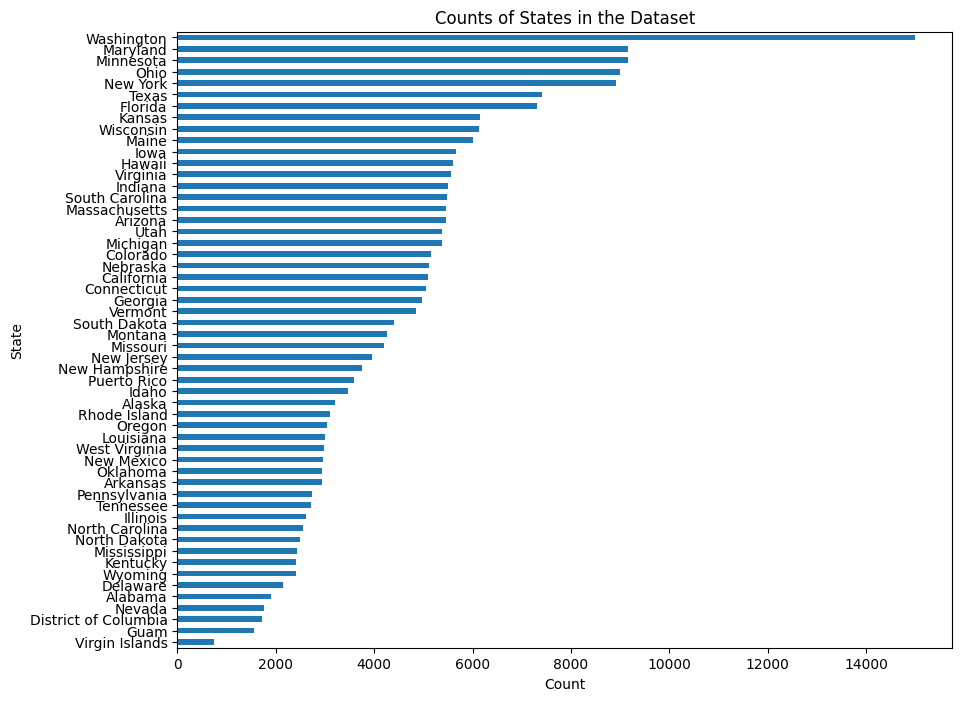

In [ ]:
# Count the occurrences of each state
state_counts = df['State'].value_counts()

# Sort the states by count in descending order
state_counts = state_counts.sort_values(ascending=True)  # Sort in ascending order

# Create a horizontal bar graph with states in descending order
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
state_counts.plot(kind='barh')  # Use 'barh' for a horizontal bar graph
plt.title("Counts of States in the Dataset")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

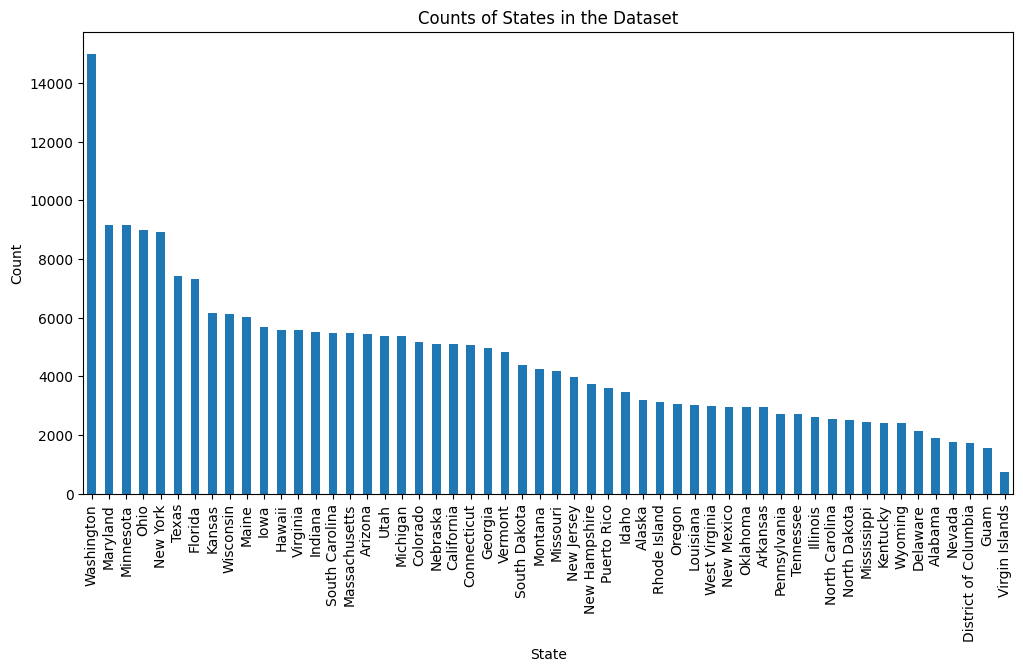

In [ ]:
# Count the occurrences of each state
state_counts = df['State'].value_counts()

# Sort the states by count in descending order
state_counts = state_counts.sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title("Counts of States in the Dataset")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
pip install geopandas matplotlib pandas

In [ ]:
import os
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/United States/"
os.chdir(pathname)

filename = "US_State_Boundaries.shp"
us_states = gpd.read_file(filename)

Mounted at /content/drive


In [ ]:
print(us_states.columns)

Index(['FID', 'OBJECTID', 'NAME', 'STATE_ABBR', 'STATE_FIPS', 'ORDER_ADM',
       'MONTH_ADM', 'DAY_ADM', 'YEAR_ADM', 'TYPE', 'POP', 'SQ_MILES',
       'PRIM_MILES', 'Shape_Leng', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'AgeNumeric',
       'PhysicalHealthCategories', 'MentalHealthCategories',
       'SleepHourCategories', 'BMI2', 'BMI3', 'ECigaretteUsage2',
       'SmokerStatus2', 'SmokerStatus3', 'HadDiabetes2', 'TetanusLa

In [ ]:
# Merge the 'df' DataFrame with 'us_states' based on the 'NAME' column from 'us_states' and 'State' column from 'df'
merged_data = us_states.merge(df, left_on='NAME', right_on='State', how='inner')


In [ ]:
#fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#us_states.boundary.plot(ax=ax, linewidth=1)  # Plot state boundaries
#merged_data.plot(column="HadHeartAttack", ax=ax, cmap="coolwarm", legend=True)
#ax.set_title("Choropleth Map of HadHeartAttack by U.S. State")
#plt.show()

In [ ]:
'HadHeartAttack' in df.columns

True

## Combined plot with boxplots and histograms for two groups and their BMI's:

*   Individuals with Heart Disease
*   Individuals WIHOUT Heart Disease



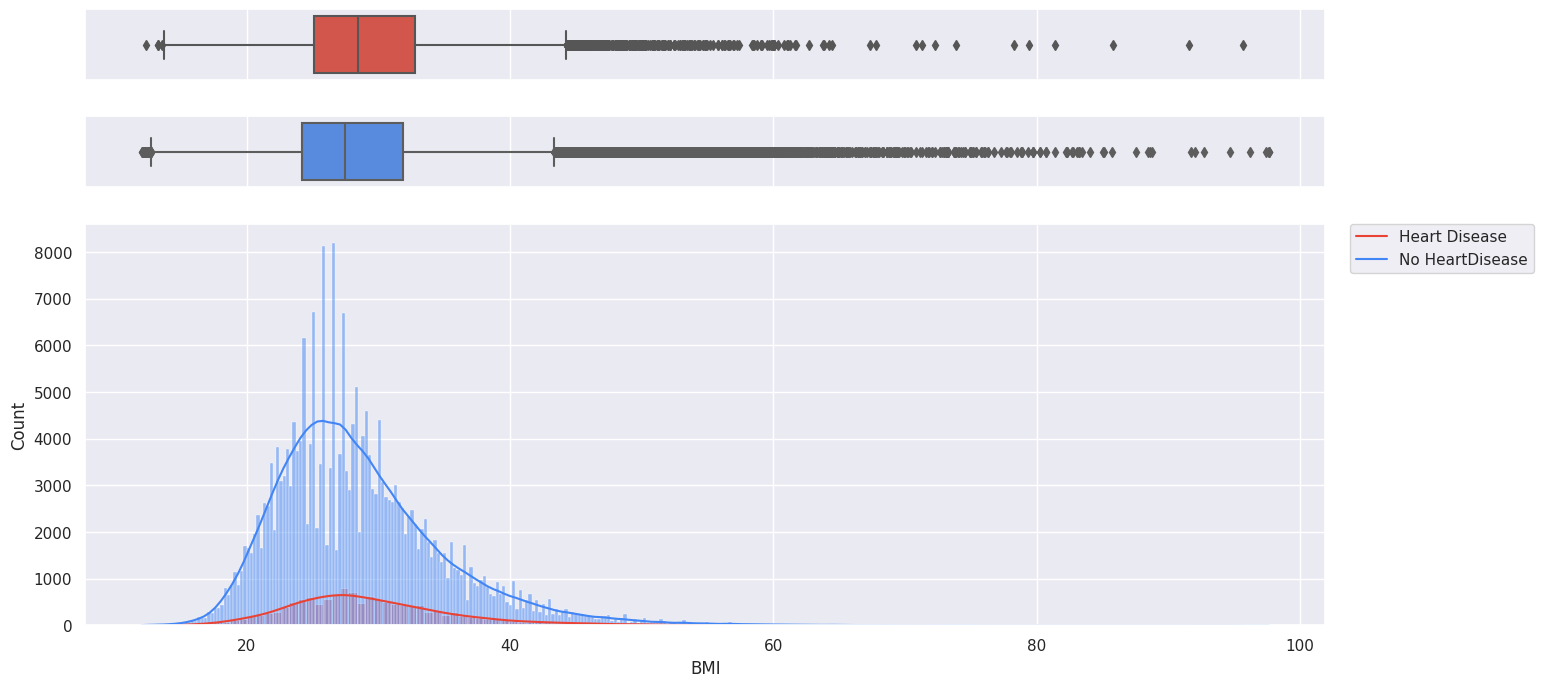

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HadHeartAttack']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HadHeartAttack']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HadHeartAttack']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HadHeartAttack']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')

# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

**Visualization of Categorical Data**

## Plot of the Gender category depending on two things:

*   No Heart Disease
*   With Heart Disease



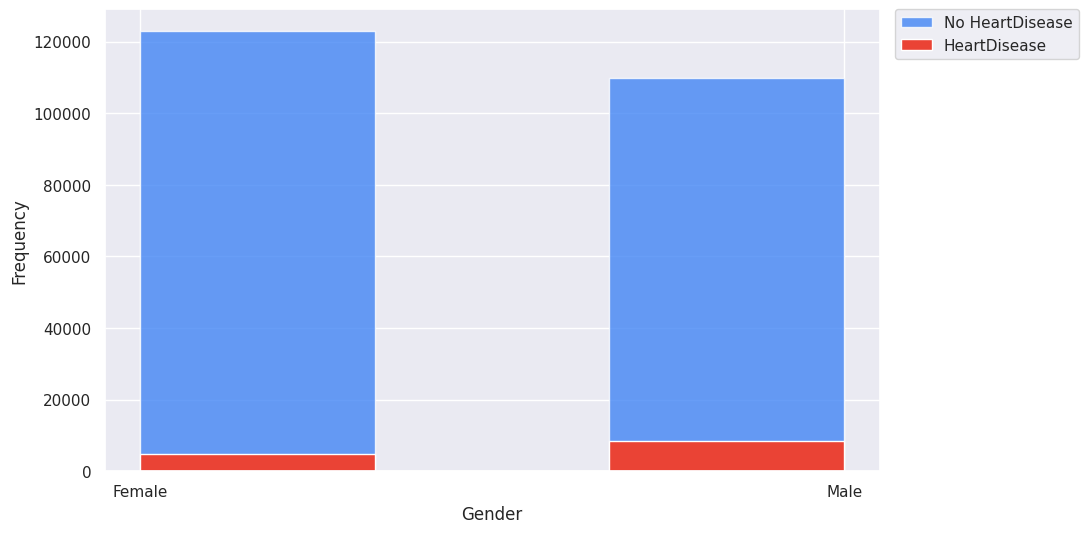

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


## **Probability of Gender and Heart Disease**

In [ ]:
female_with_heart_disease = len(df[(df['HadHeartAttack']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HadHeartAttack']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.0719331342475488
Probability of Female to have Heart disease: 0.038589737571006054


## Plot of the Smoking category depending on two things:

*   No Heart Disease
*   With Heart Disease

In [ ]:
# Assuming you have a DataFrame df with the column "SmokerStatus"

# Define a mapping of existing values to the desired categories
category_mapping = {
    "Never smoked": "Never Smoked",
    "Former smoker": "Smoker",
    "Current smoker - now smokes every day": "Smoker",
    "Current smoker - now smokes some days": "Smoker"
}

# Use the mapping to create a new column with categories
df['SmokerStatus3'] = df['SmokerStatus'].map(category_mapping)

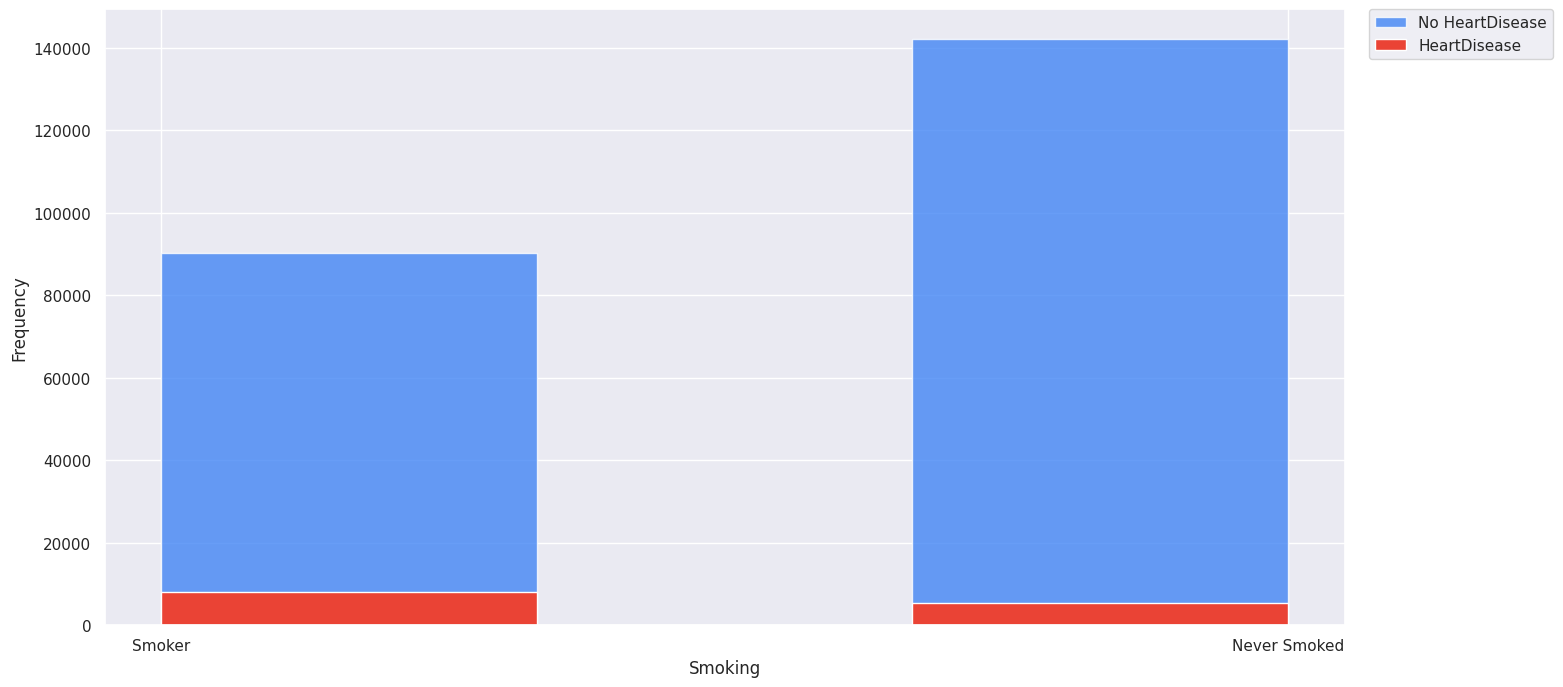

In [ ]:
import matplotlib.pyplot as plt

# Filter rows based on 'HadHeartAttack' values
heart_disease_data = df[df["HadHeartAttack"] == 'Yes']
no_heart_disease_data = df[df["HadHeartAttack"] == 'No']

# Plot histograms for 'SmokerStatus' for both cases
plt.hist(no_heart_disease_data["SmokerStatus3"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
plt.hist(heart_disease_data["SmokerStatus3"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

plt.xlabel("Smoking")
plt.ylabel("Frequency")

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()


## **Probability of being a Smoker and Heart Disease**

In [ ]:
smoke_and_heart_disease = len(df[(df['HadHeartAttack'] == 'Yes') & (df['SmokerStatus3'] == 'Yes')])
num_smoke = len(df[df['SmokerStatus3'] == 'Yes'])
no_smoke_and_heart_disease = len(df[(df['HadHeartAttack'] == 'Yes') & (df['SmokerStatus3'] == 'No')])
num_no_smoke = len(df[df['SmokerStatus3'] == 'No'])

# Calculate probabilities with checks for division by zero
probability_smoke = smoke_and_heart_disease / num_smoke if num_smoke > 0 else 0
probability_no_smoke = no_smoke_and_heart_disease / num_no_smoke if num_no_smoke > 0 else 0

print('Probability of Heart disease if you smoke:', probability_smoke)
print("Probability of Heart disease if you don't smoke:", probability_no_smoke)

Probability of Heart disease if you smoke: 0
Probability of Heart disease if you don't smoke: 0


# **Bmi and its probabilities**

In [ ]:
# Filter rows based on 'HadHeartAttack' values
heart_disease_data = df[df["HadHeartAttack"] == 'Yes']
no_heart_disease_data = df[df["HadHeartAttack"] == 'No']

# Filter rows based on BMI values between 25 and 40
overweight_heart_disease = len(heart_disease_data[(heart_disease_data['BMI'] >= 25) & (heart_disease_data['BMI'] <= 40)])
total_overweight = len(df[(df['BMI'] >= 25) & (df['BMI'] <= 40)])

# Calculate the probability
probability_overweight_heart_disease = overweight_heart_disease / total_overweight

print("Probability of Heart disease for individuals with BMI between 25 and 40:", probability_overweight_heart_disease)

Probability of Heart disease for individuals with BMI between 25 and 40: 0.059805849882621664


In [ ]:
# Filter rows based on 'HadHeartAttack' values
heart_disease_data = df[df["HadHeartAttack"] == 'Yes']
no_heart_disease_data = df[df["HadHeartAttack"] == 'No']

# Filter rows based on BMI values under 25 to 18.5
normal_bmi_heart_disease = len(heart_disease_data[(heart_disease_data['BMI'] < 25) & (heart_disease_data['BMI'] >= 18.5)])
total_normal_bmi = len(df[(df['BMI'] < 25) & (df['BMI'] >= 18.5)])

# Calculate the probability
probability_normal_bmi_heart_disease = normal_bmi_heart_disease / total_normal_bmi

print("Probability of Heart disease for individuals with BMI between 18.5 and 25:", probability_normal_bmi_heart_disease)

Probability of Heart disease for individuals with BMI between 18.5 and 25: 0.041790917610973845


In [ ]:
# Calculate the probability of heart disease for BMI below 18
under_18_prob = len(df[(df['BMI'] < 18) & (df['HadHeartAttack'] == 'Yes')]) / len(df[df['BMI'] < 18])

print("Probability of Heart disease for BMI below 18:", under_18_prob)

Probability of Heart disease for BMI below 18: 0.05744336569579288


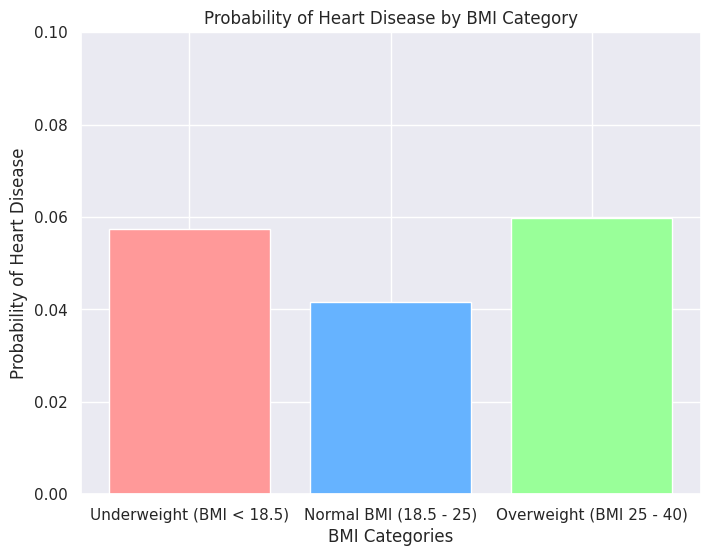

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated the probabilities for each BMI range as follows:
underweight_prob = 0.0574  # Replace with the actual probability for underweight
normal_bmi_prob = 0.0417   # Replace with the actual probability for normal BMI
overweight_prob = 0.0598  # Replace with the actual probability for overweight

# Create a bar graph
bmi_categories = ['Underweight (BMI < 18.5)', 'Normal BMI (18.5 - 25)', 'Overweight (BMI 25 - 40)']
probabilities = [underweight_prob, normal_bmi_prob, overweight_prob]

plt.figure(figsize=(8, 6))
plt.bar(bmi_categories, probabilities, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xlabel('BMI Categories')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by BMI Category')
plt.ylim(0, 0.1)  # Adjust this value to zoom in further

plt.show()

# **Probablity of Kidney Disease and Heart Disease**

In [ ]:
# Filter rows based on 'HadHeartAttack' values
heart_disease_data = df[df["HadHeartAttack"] == 'Yes']
no_heart_disease_data = df[df["HadHeartAttack"] == 'No']

# Calculate the probability of kidney disease given heart disease
kidney_disease_and_heart_disease = len(heart_disease_data[heart_disease_data["HadKidneyDisease"] == 'Yes'])
heart_disease_count = len(heart_disease_data)
probability_kidney_given_heart = kidney_disease_and_heart_disease / heart_disease_count

# Calculate the probability of kidney disease given no heart disease
kidney_disease_and_no_heart_disease = len(no_heart_disease_data[no_heart_disease_data["HadKidneyDisease"] == 'Yes'])
no_heart_disease_count = len(no_heart_disease_data)
probability_kidney_given_no_heart = kidney_disease_and_no_heart_disease / no_heart_disease_count

print("Probability of Kidney Disease given Heart Disease:", probability_kidney_given_heart)
print("Probability of Kidney Disease given No Heart Disease:", probability_kidney_given_no_heart)

Probability of Kidney Disease given Heart Disease: 0.1410494975809453
Probability of Kidney Disease given No Heart Disease: 0.04036925246583942


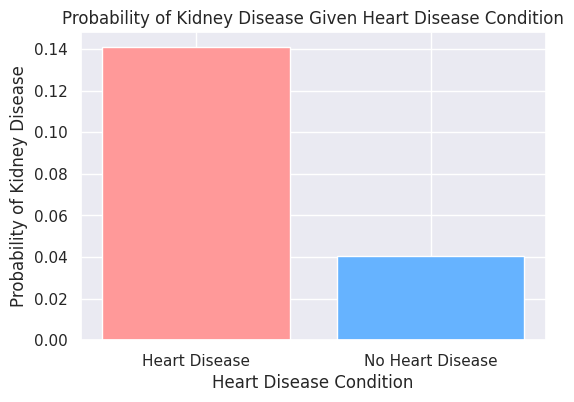

In [ ]:
import matplotlib.pyplot as plt

# Calculate the probabilities
probability_kidney_given_heart = 0.141049  # Replace with the actual probability for kidney disease given heart disease
probability_kidney_given_no_heart = 0.04036 # Replace with the actual probability for kidney disease given no heart disease

# Create a bar graph
conditions = ['Heart Disease', 'No Heart Disease']
probabilities = [probability_kidney_given_heart, probability_kidney_given_no_heart]

plt.figure(figsize=(6, 4))
plt.bar(conditions, probabilities, color=['#ff9999', '#66b3ff'])
plt.xlabel('Heart Disease Condition')
plt.ylabel('Probability of Kidney Disease')
plt.title('Probability of Kidney Disease Given Heart Disease Condition')

plt.show()

# **Probablity of Stroke Disease and Heart Disease**

In [ ]:
# Filter rows based on 'HadStroke' values
stroke_data = df[df["HadStroke"] == 'Yes']
no_stroke_data = df[df["HadStroke"] == 'No']

# Calculate the probabilities
probability_stroke_given_stroke_category = len(stroke_data[stroke_data["HadHeartAttack"] == 'Yes']) / len(stroke_data)
probability_stroke_given_no_stroke_category = len(no_stroke_data[no_stroke_data["HadHeartAttack"] == 'Yes']) / len(no_stroke_data)

print("Probability of heart disease given HadStroke='Yes':", probability_stroke_given_stroke_category)
print("Probability of heart disease given HadStroke='No':", probability_stroke_given_no_stroke_category)

Probability of heart disease given HadStroke='Yes': 0.24903570368905154
Probability of heart disease given HadStroke='No': 0.04627769158379327


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246013 entries, 109454 to 190159
Data columns (total 52 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      246013 non-null  object  
 1   Sex                        0 non-null       float64 
 2   GeneralHealth              0 non-null       float64 
 3   PhysicalHealthDays         246013 non-null  float64 
 4   MentalHealthDays           246013 non-null  float64 
 5   LastCheckupTime            246013 non-null  object  
 6   PhysicalActivities         246013 non-null  object  
 7   SleepHours                 246013 non-null  float64 
 8   RemovedTeeth               246013 non-null  object  
 9   HadHeartAttack             246013 non-null  int64   
 10  HadAngina                  0 non-null       float64 
 11  HadStroke                  0 non-null       float64 
 12  HadAsthma                  0 non-null       float64 
 13  HadSkinCa

In [ ]:
# Filter rows based on 'HadStroke' values
stroke_data = df[df["FluVaxLast12"] == 'Yes']
no_stroke_data = df[df["FluVaxLast12"] == 'No']

# Calculate the probabilities
probability_stroke_given_stroke_category = len(stroke_data[stroke_data["HadHeartAttack"] == 'Yes']) / len(stroke_data)
probability_stroke_given_no_stroke_category = len(no_stroke_data[no_stroke_data["HadHeartAttack"] == 'Yes']) / len(no_stroke_data)

print("Probability of heart disease given FluVaxLast12='Yes':", probability_stroke_given_stroke_category)
print("Probability of heart disease given FluVaxLast12='No':", probability_stroke_given_no_stroke_category)

Probability of heart disease given FluVaxLast12='Yes': 0.0
Probability of heart disease given FluVaxLast12='No': 0.0


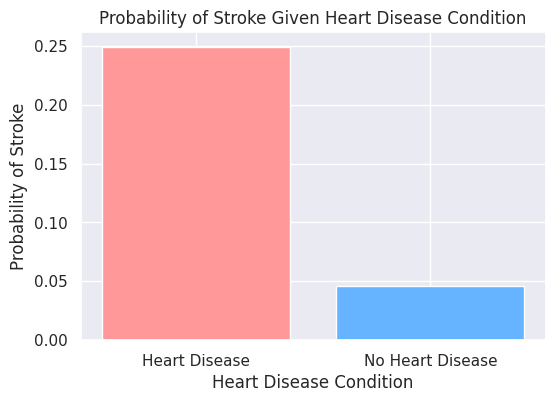

In [ ]:
import matplotlib.pyplot as plt

# Calculate the probabilities
probability_stroke_given_heart = 0.2490110  # Replace with the actual probability for stroke given heart disease
probability_stroke_given_no_heart = 0.046276  # Replace with the actual probability for stroke given no heart disease

# Create a bar graph
conditions = ['Heart Disease', 'No Heart Disease']
probabilities = [probability_stroke_given_heart, probability_stroke_given_no_heart]

plt.figure(figsize=(6, 4))
plt.bar(conditions, probabilities, color=['#ff9999', '#66b3ff'])
plt.xlabel('Heart Disease Condition')
plt.ylabel('Probability of Stroke')
plt.title('Probability of Stroke Given Heart Disease Condition')

plt.show()

# **Probablity of Skin Cancer and Heart Disease**

In [ ]:
# Filter rows based on 'HadSkinCancer' values
skin_cancer_data = df[df["HadSkinCancer"] == 'Yes']
no_skin_cancer_data = df[df["HadSkinCancer"] == 'No']

# Calculate the probabilities
probability_heart_disease_given_skin_cancer_category = len(skin_cancer_data[skin_cancer_data["HadHeartAttack"] == 'Yes']) / len(skin_cancer_data)
probability_heart_disease_given_no_skin_cancer_category = len(no_skin_cancer_data[no_skin_cancer_data["HadHeartAttack"] == 'Yes']) / len(no_skin_cancer_data)

print("Probability of heart disease given HadSkinCancer='Yes':", probability_heart_disease_given_skin_cancer_category)
print("Probability of heart disease given HadSkinCancer='No':", probability_heart_disease_given_no_skin_cancer_category)

Probability of heart disease given HadSkinCancer='Yes': 0.0913459251153718
Probability of heart disease given HadSkinCancer='No': 0.05117914255491258


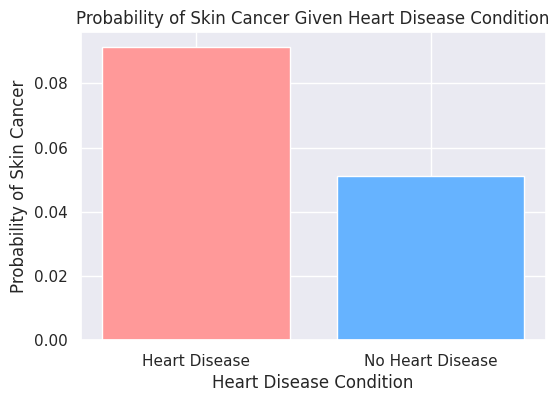

In [ ]:
import matplotlib.pyplot as plt

# Calculate the probabilities
probability_skin_cancer_given_heart = 0.091337 # Replace with the actual probability for skin cancer given heart disease
probability_skin_cancer_given_no_heart = 0.0511775 # Replace with the actual probability for skin cancer given no heart disease

# Create a bar graph
conditions = ['Heart Disease', 'No Heart Disease']
probabilities = [probability_skin_cancer_given_heart, probability_skin_cancer_given_no_heart]

plt.figure(figsize=(6, 4))
plt.bar(conditions, probabilities, color=['#ff9999', '#66b3ff'])
plt.xlabel('Heart Disease Condition')
plt.ylabel('Probability of Skin Cancer')
plt.title('Probability of Skin Cancer Given Heart Disease Condition')

plt.show()

# **Probablity of Angina and Heart Disease**

In [ ]:
# Filter rows based on 'HadAngina' values
angina_data = df[df["HadAngina"] == 'Yes']
no_angina_data = df[df["HadAngina"] == 'No']

# Calculate the probabilities
probability_heart_disease_given_angina_category = len(angina_data[angina_data["HadHeartAttack"] == 'Yes']) / len(angina_data)
probability_heart_disease_given_no_angina_category = len(no_angina_data[no_angina_data["HadHeartAttack"] == 'Yes']) / len(no_angina_data)

print("Probability of heart disease given HadAngina='Yes':", probability_heart_disease_given_angina_category)
print("Probability of heart disease given HadAngina='No':", probability_heart_disease_given_no_angina_category)

Probability of heart disease given HadAngina='Yes': 0.45288570855346755
Probability of heart disease given HadAngina='No': 0.028836665801090625


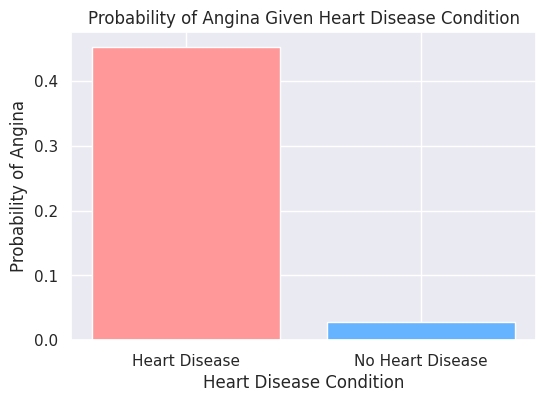

In [ ]:
import matplotlib.pyplot as plt

# Calculate the probabilities
probability_angina_given_heart = 0.4528857  # Replace with the actual probability for angina given heart disease
probability_angina_given_no_heart = 0.0288355  # Replace with the actual probability for angina given no heart disease

# Create a bar graph
conditions = ['Heart Disease', 'No Heart Disease']
probabilities = [probability_angina_given_heart, probability_angina_given_no_heart]

plt.figure(figsize=(6, 4))
plt.bar(conditions, probabilities, color=['#ff9999', '#66b3ff'])
plt.xlabel('Heart Disease Condition')
plt.ylabel('Probability of Angina')
plt.title('Probability of Angina Given Heart Disease Condition')

plt.show()

# **Probablity of COPD and Heart Disease**

In [ ]:
# Filter rows based on 'HadCOPD' values
copd_data = df[df["HadCOPD"] == 'Yes']
no_copd_data = df[df["HadCOPD"] == 'No']

# Calculate the probabilities
probability_heart_disease_given_copd_category = len(copd_data[copd_data["HadHeartAttack"] == 'Yes']) / len(copd_data)
probability_heart_disease_given_no_copd_category = len(no_copd_data[no_copd_data["HadHeartAttack"] == 'Yes']) / len(no_copd_data)

print("Probability of heart disease given HadCOPD='Yes':", probability_heart_disease_given_copd_category)
print("Probability of heart disease given HadCOPD='No':", probability_heart_disease_given_no_copd_category)

Probability of heart disease given HadCOPD='Yes': 0.15926081920606508
Probability of heart disease given HadCOPD='No': 0.04585519273717178


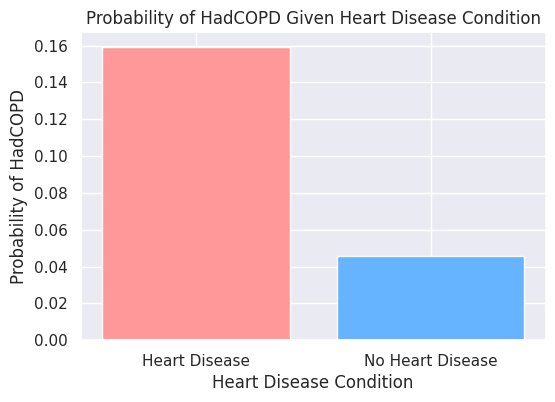

In [ ]:
import matplotlib.pyplot as plt

# Calculate the probabilities
probability_copd_given_heart = 0.159260  # Replace with the actual probability for HadCOPD given heart disease
probability_copd_given_no_heart = 0.0458533  # Replace with the actual probability for HadCOPD given no heart disease

# Create a bar graph
conditions = ['Heart Disease', 'No Heart Disease']
probabilities = [probability_copd_given_heart, probability_copd_given_no_heart]

plt.figure(figsize=(6, 4))
plt.bar(conditions, probabilities, color=['#ff9999', '#66b3ff'])
plt.xlabel('Heart Disease Condition')
plt.ylabel('Probability of HadCOPD')
plt.title('Probability of HadCOPD Given Heart Disease Condition')

plt.show()

# **Probablity of COVID and Heart Disease**

In [ ]:
# Filter rows based on 'CovidPos' values
covid_positive_data = df[df["CovidPos2"] == 'Yes']
no_covid_data = df[df["CovidPos2"] == 'No']

# Calculate the probabilities
probability_heart_disease_given_covid_positive = len(covid_positive_data[covid_positive_data["HadHeartAttack"] == 'Yes']) / len(covid_positive_data)
probability_heart_disease_given_no_covid = len(no_covid_data[no_covid_data["HadHeartAttack"] == 'Yes']) / len(no_covid_data)

print("Probability of heart disease given CovidPos2='Yes':", probability_heart_disease_given_covid_positive)
print("Probability of heart disease given CovidPos2='No':", probability_heart_disease_given_no_covid)

Probability of heart disease given CovidPos2='Yes': 0.04870314544110119
Probability of heart disease given CovidPos2='No': 0.05843499883440827


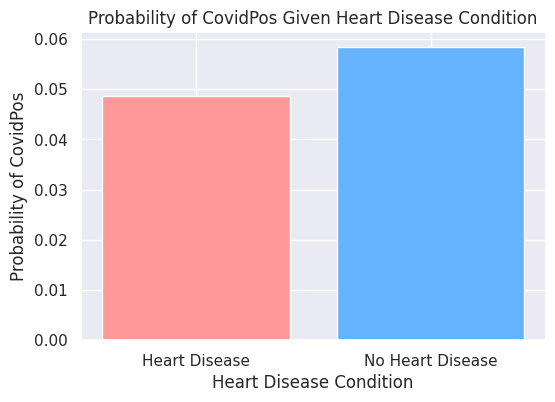

In [ ]:
import matplotlib.pyplot as plt

# Calculate the probabilities
probability_covidpos_given_heart = 0.04870  # Replace with the actual probability for CovidPos given heart disease
probability_covidpos_given_no_heart = 0.05843  # Replace with the actual probability for CovidPos given no heart disease

# Create a bar graph
conditions = ['Heart Disease', 'No Heart Disease']
probabilities = [probability_covidpos_given_heart, probability_covidpos_given_no_heart]

plt.figure(figsize=(6, 4))
plt.bar(conditions, probabilities, color=['#ff9999', '#66b3ff'])
plt.xlabel('Heart Disease Condition')
plt.ylabel('Probability of CovidPos')
plt.title('Probability of CovidPos Given Heart Disease Condition')

plt.show()

# **Age and Heart disease frequency category**

In [ ]:
age_mapping = {
    "Age 18 to 24": "18 to 24",
    "Age 25 to 29": "25 to 29",
    "Age 30 to 34": "30 to 34",
    "Age 35 to 39": "35 to 39",
    "Age 40 to 44": "40 to 44",
    "Age 45 to 49": "45 to 49",
    "Age 50 to 54": "50 to 54",
    "Age 55 to 59": "55 to 59",
    "Age 60 to 64": "60 to 64",
    "Age 65 to 69": "65 to 69",
    "Age 70 to 74": "70 to 74",
    "Age 75 to 79": "75 to 79",
    "Age 80 or older": "80 and over"
}

df['AgeCategory2'] = df['AgeCategory'].map(age_mapping)


In [ ]:
 # Define the custom categories in the desired order
custom_categories = [
    "18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49",
    "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79", "80 and over"
]

# Convert 'AgeCategory2' to a categorical column with custom categories
df['AgeCategory2'] = pd.Categorical(df['AgeCategory2'], categories=custom_categories, ordered=True)

# Sort the DataFrame by the custom categorical order
df = df.sort_values(by='AgeCategory2')

# Now, when you access df['AgeCategory2'], it will be sorted as per your custom order.

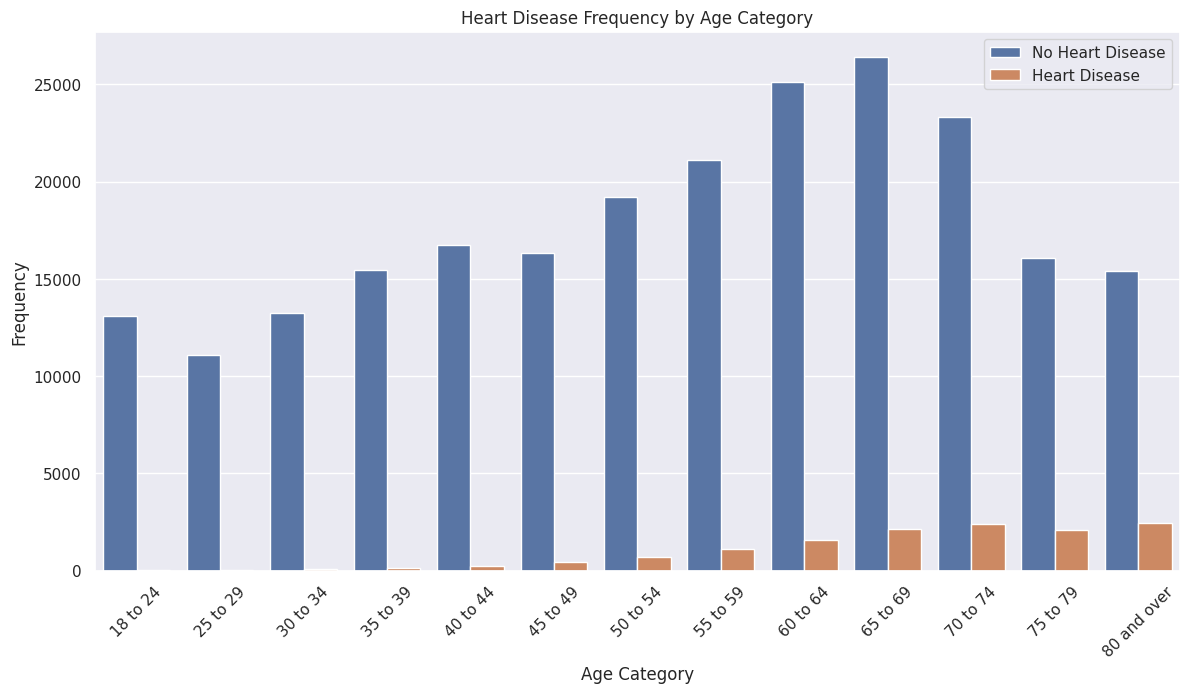

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.countplot(x='AgeCategory2', data=df, hue='HadHeartAttack')
plt.title('Heart Disease Frequency by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

In [ ]:
df.groupby(['AlcoholDrinkers','HadHeartAttack'])['HadHeartAttack'].count()

AlcoholDrinkers  HadHeartAttack
No               No                102605
                 Yes                 8109
Yes              No                129973
                 Yes                 5326
Name: HadHeartAttack, dtype: int64

In [ ]:
HeartDisease_yes = df.query("HadHeartAttack == 'Yes'")

In [ ]:
fig = px.histogram(HeartDisease_yes, x = df['AlcoholDrinkers'],
                      title = 'people drinking the AlcoholDrinkers', text_auto = 'd3-format', template = 'plotly_dark')
fig.show()

In [ ]:
# Group the data by 'AgeCategory2' and 'HadHeartAttack' and count the occurrences
age_heart_grouped = df.groupby(['AgeCategory2', 'HadHeartAttack']).size().unstack().reset_index()
age_heart_grouped.columns = ['AgeCategory2', 'No', 'Yes']

# Calculate the probability of having heart disease for each age category
age_heart_grouped['Probability_HeartDisease'] = age_heart_grouped['Yes'] / (age_heart_grouped['No'] + age_heart_grouped['Yes'])

# Sort the data by age category
age_heart_grouped = age_heart_grouped.sort_values(by='AgeCategory2')

print(age_heart_grouped)

   AgeCategory2     No   Yes  Probability_HeartDisease
0      18 to 24  13072    50                  0.003810
1      25 to 29  11062    47                  0.004231
2      30 to 34  13256    90                  0.006744
3      35 to 39  15458   156                  0.009991
4      40 to 44  16745   228                  0.013433
5      45 to 49  16333   420                  0.025070
6      50 to 54  19209   703                  0.035305
7      55 to 59  21112  1112                  0.050036
8      60 to 64  25144  1575                  0.058947
9      65 to 69  26400  2155                  0.075468
10     70 to 74  23329  2408                  0.093562
11     75 to 79  16068  2065                  0.113881
12  80 and over  15390  2426                  0.136170


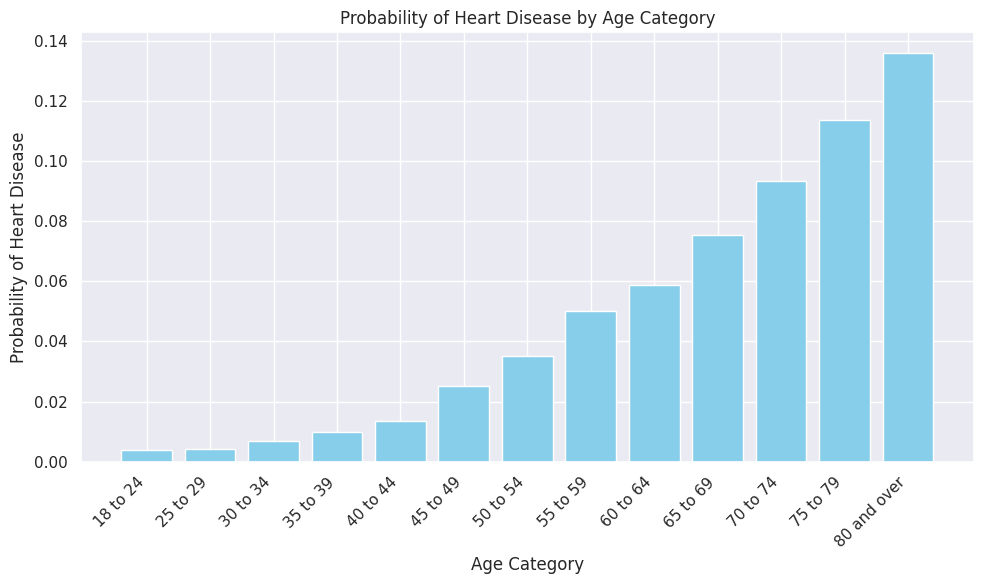

In [ ]:
import matplotlib.pyplot as plt

# Assuming you've already calculated the probabilities as mentioned in the previous code snippet
# age_heart_grouped should contain 'AgeCategory2' and 'Probability_HeartDisease' columns

plt.figure(figsize=(10, 6))
plt.bar(age_heart_grouped['AgeCategory2'], age_heart_grouped['Probability_HeartDisease'], color='skyblue')
plt.xlabel('Age Category')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by Age Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

<ipython-input-83-edbe4782a528>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



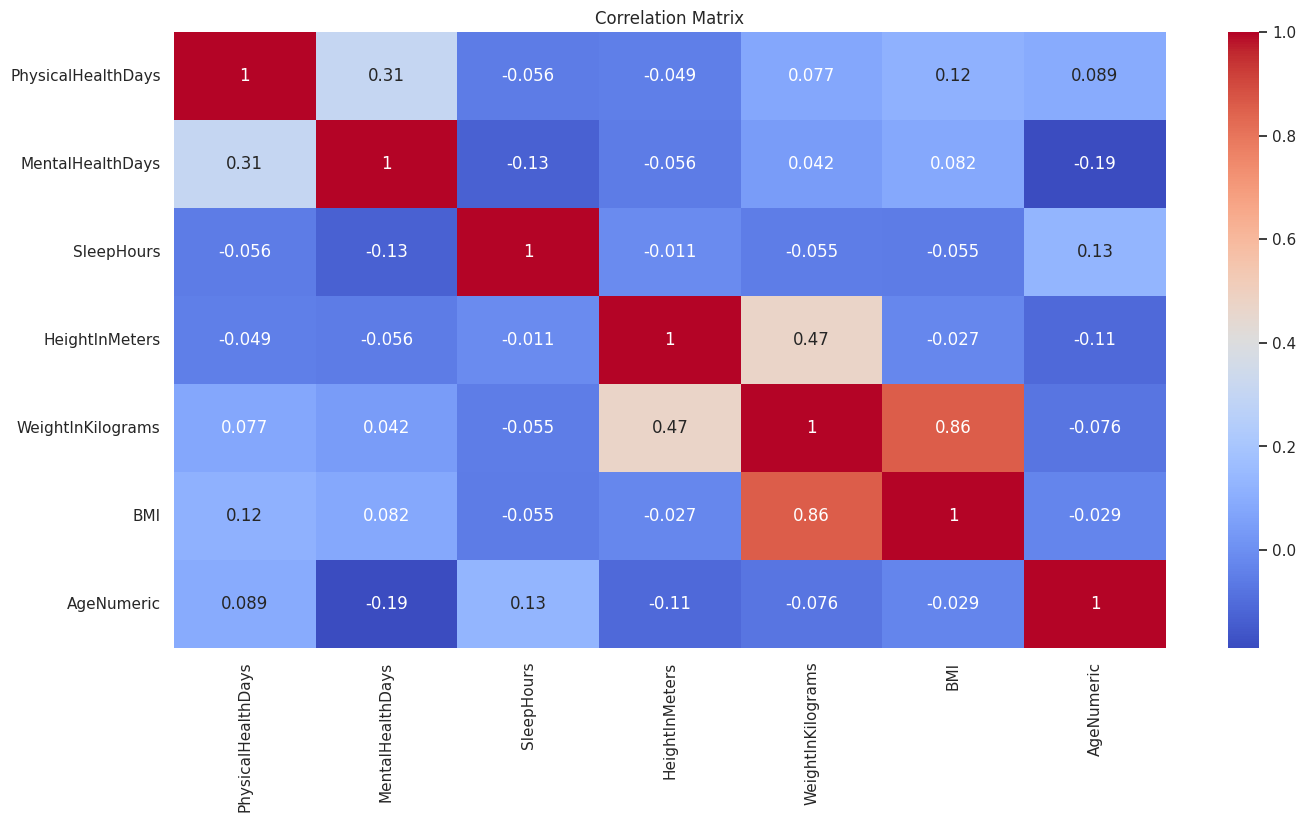

Logistic Regression Accuracy: 0.9461414954372701


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

          No       0.95      1.00      0.97     46553
         Yes       0.00      0.00      0.00      2650

    accuracy                           0.95     49203
   macro avg       0.47      0.50      0.49     49203
weighted avg       0.90      0.95      0.92     49203

Random Forest Accuracy: 0.9343942442533992
              precision    recall  f1-score   support

          No       0.95      0.99      0.97     46553
         Yes       0.14      0.04      0.06      2650

    accuracy                           0.93     49203
   macro avg       0.54      0.51      0.52     49203
weighted avg       0.90      0.93      0.92     49203



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 1. Correlation Analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Handle missing values (replace NaN with mean of the column)
imputer = SimpleImputer(strategy='mean')
df['AgeNumeric'] = imputer.fit_transform(df['AgeNumeric'].values.reshape(-1, 1))

# Convert 'SmokerStatus2' to numerical values
le = LabelEncoder()
df['SmokerStatus2'] = le.fit_transform(df['SmokerStatus2'])

# Convert 'HadCOPD' to numerical values
df['HadCOPD'] = le.fit_transform(df['HadCOPD'])

# 2. Logistic Regression (Example)
# Let's predict heart disease based on some features.
X = df[['AgeNumeric', 'BMI', 'SmokerStatus2', 'HadCOPD']]
y = df['HadHeartAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# 3. Random Forest (Example)
# Another machine learning model for prediction.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

# 4. K-Means Clustering (Example)
# Perform clustering analysis based on features.
features_for_clustering = df[['AgeNumeric', 'BMI', 'SmokerStatus2']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 5. Additional Analyses:
# You can extend your analysis with additional techniques as needed.

# 6. Data Visualization: Create more plots or graphs to explore the data visually.

plt.show()

## Plot of the Race category depending on two things:

*   No Heart Disease
*   With Heart Disease

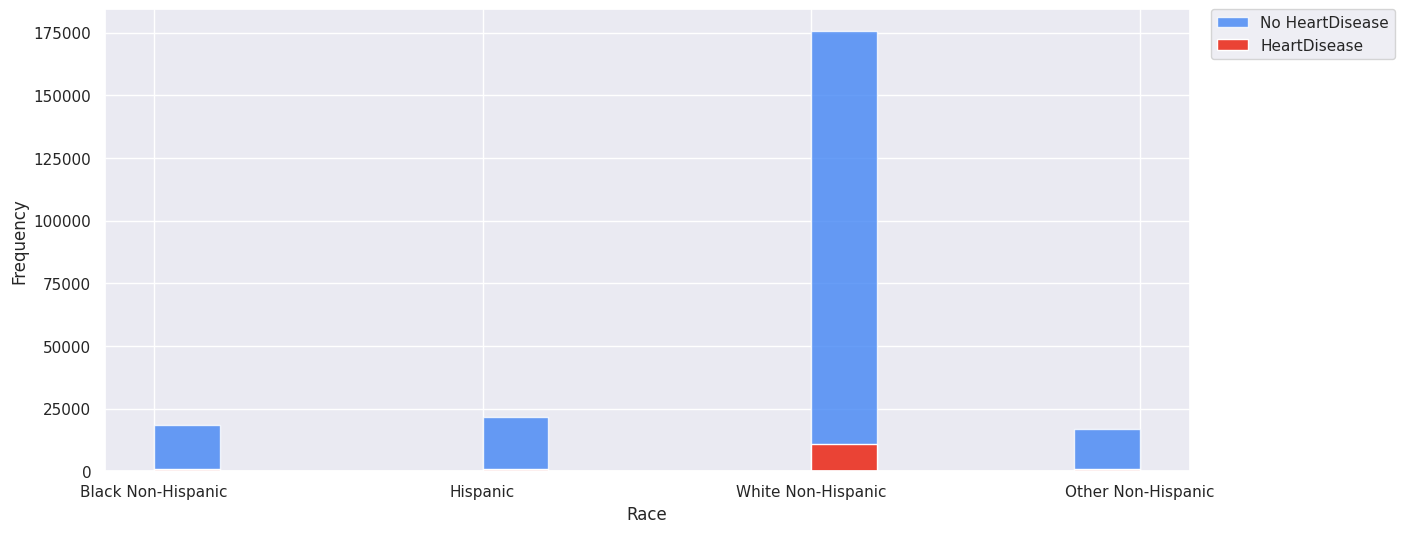

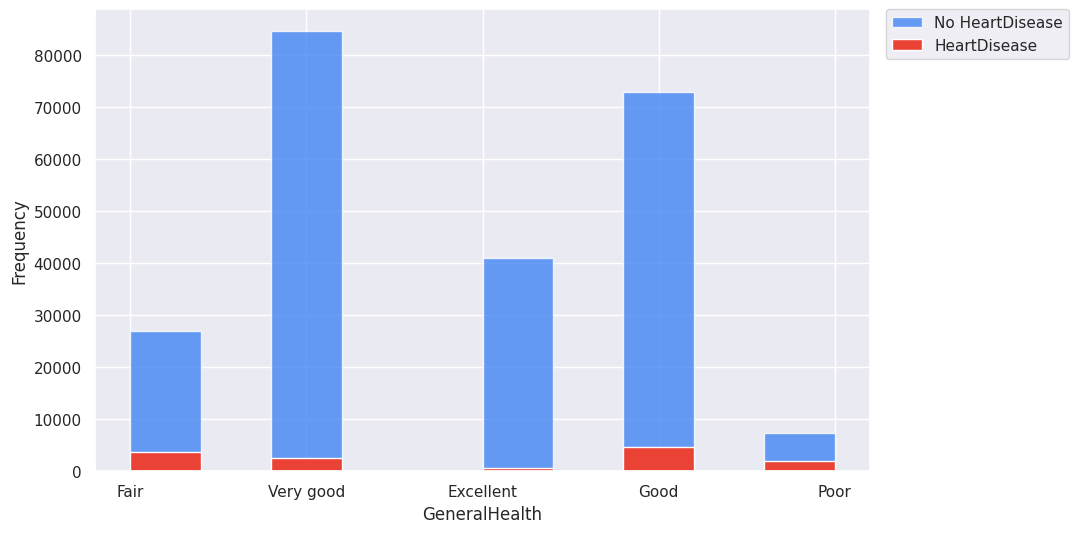

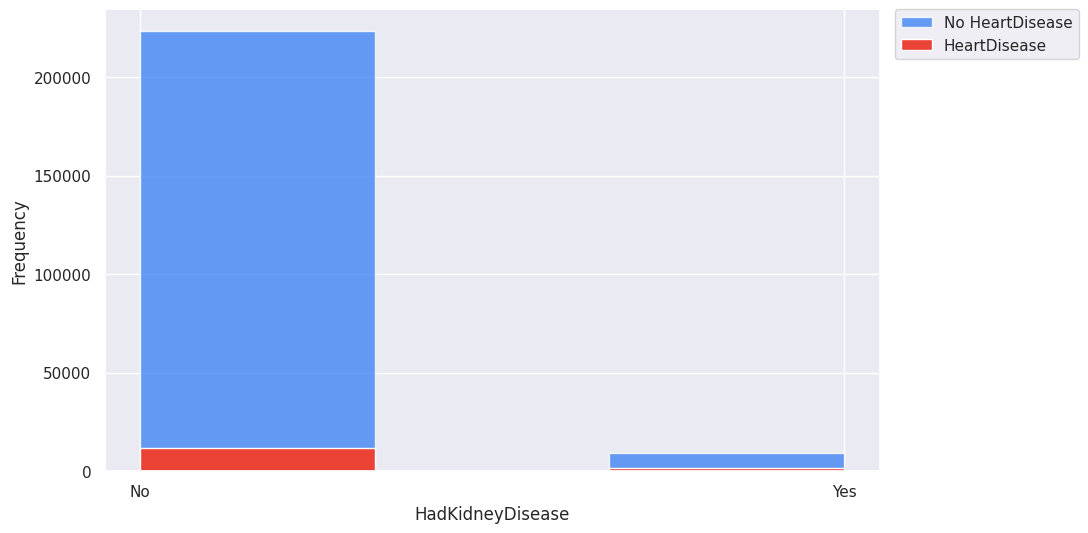

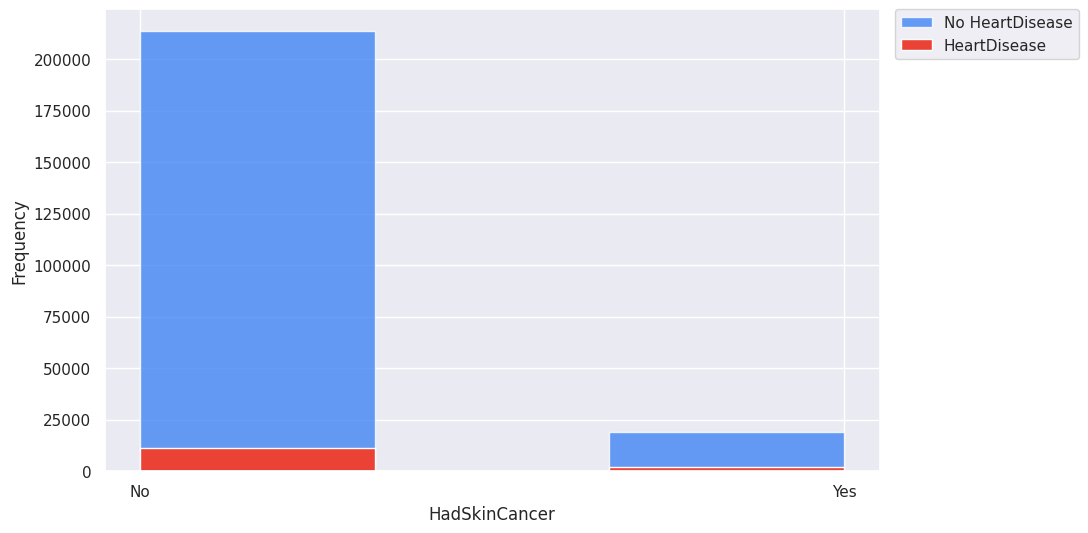

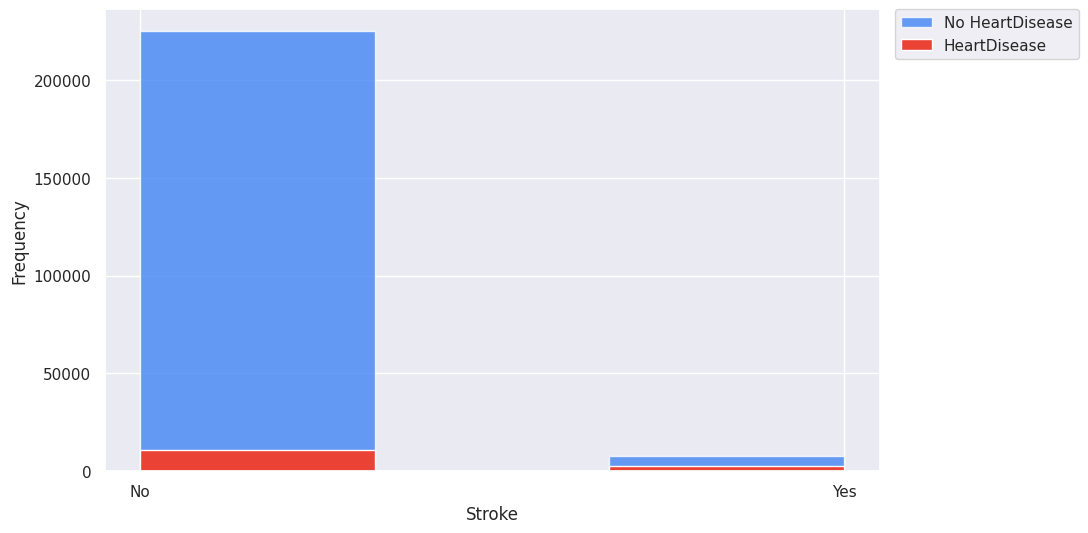

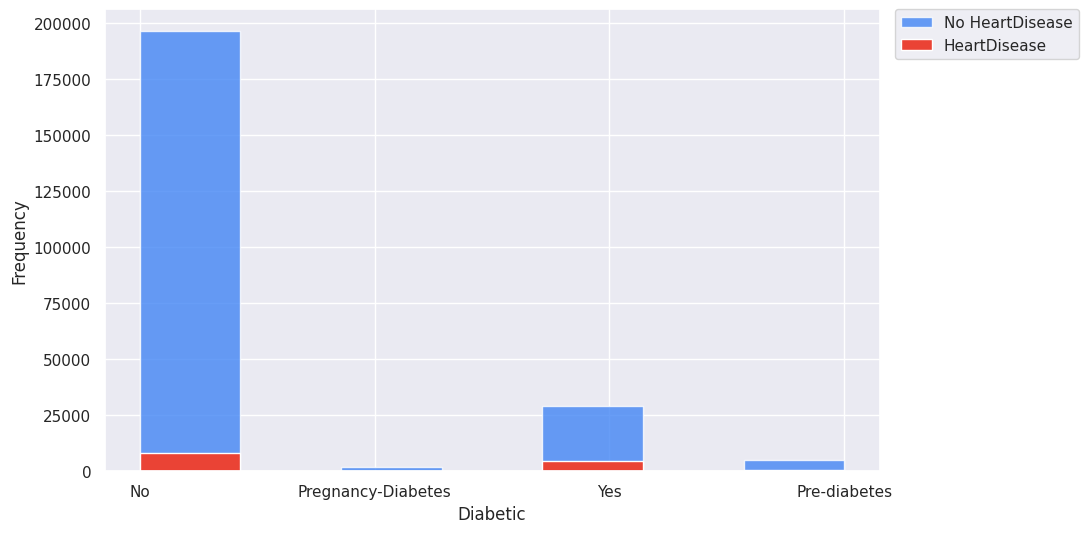

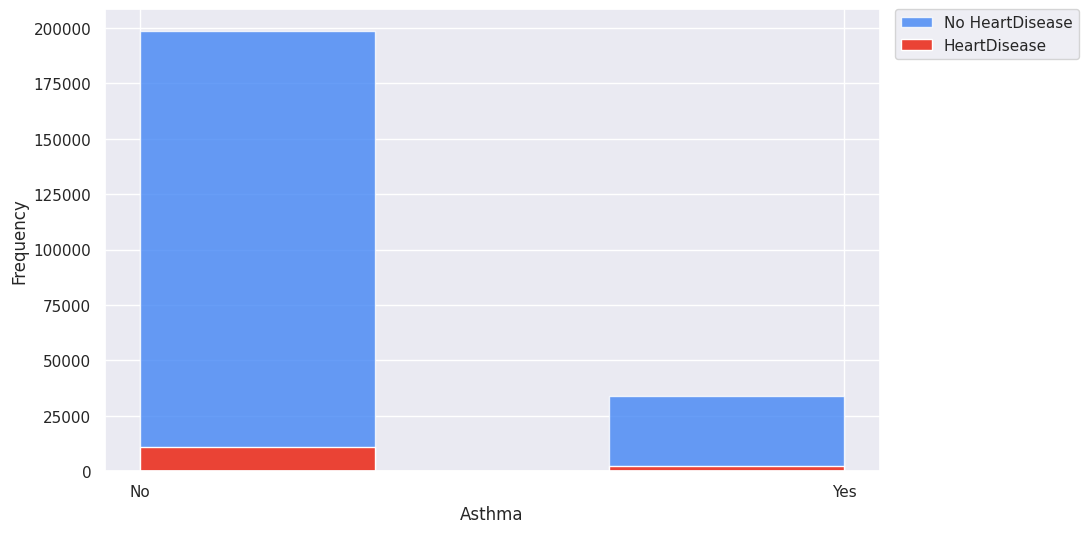

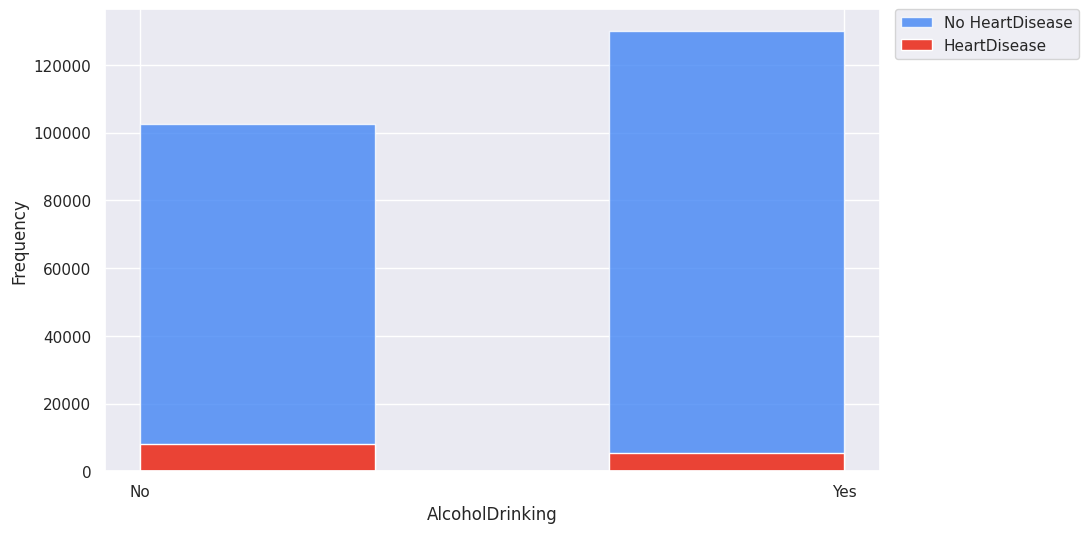

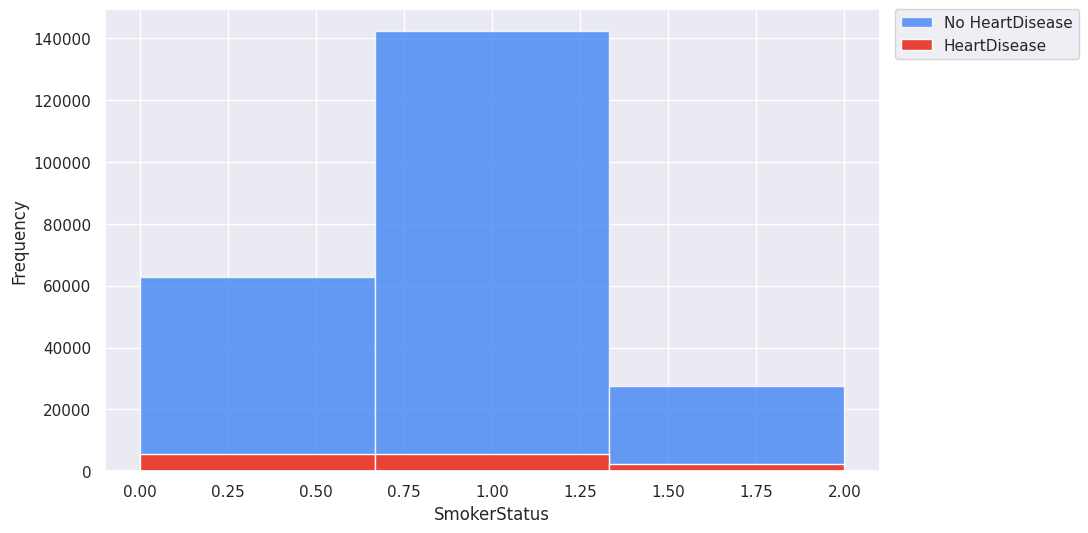

In [ ]:
#Race
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(df[df["HadHeartAttack"]=='No']["RaceEthnicityCategory"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["RaceEthnicityCategory"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


#General Health
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["GeneralHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["GeneralHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GeneralHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

#Kidney Disease
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["HadKidneyDisease"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["HadKidneyDisease"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("HadKidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


#Skin Cancer
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["HadSkinCancer"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["HadSkinCancer"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("HadSkinCancer")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

#Stroke
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["HadStroke"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["HadStroke"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

#Diabetes
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["HadDiabetes2"], bins=7, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["HadDiabetes2"], bins=7, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

#Asthma
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["HadAsthma"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["HadAsthma"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


#Alcohol Drinking
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["AlcoholDrinkers"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["AlcoholDrinkers"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


#Smoking
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HadHeartAttack"]=='No']["SmokerStatus2"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HadHeartAttack"]=='Yes']["SmokerStatus2"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("SmokerStatus")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)



In [ ]:
df['HadHeartAttack'] = df['HadHeartAttack'].apply(lambda x: 1 if x == 'Yes' else 0)

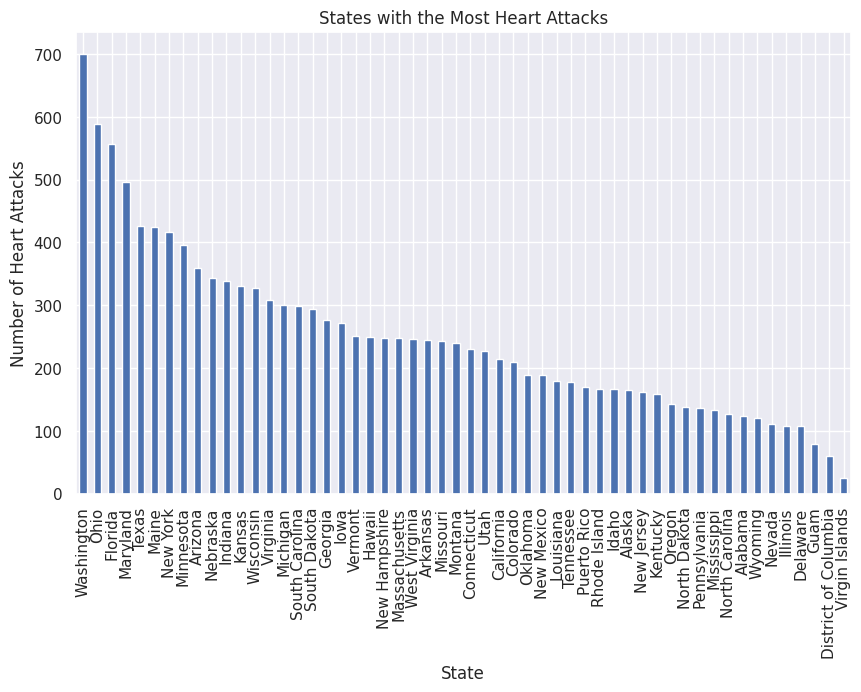

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'State' and count the number of 'HadHeartAttack' occurrences in each state
state_counts = df.groupby('State')['HadHeartAttack'].sum().sort_values(ascending=False)

# Create the bar graph
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.title('States with the Most Heart Attacks')
plt.xlabel('State')
plt.ylabel('Number of Heart Attacks')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
import pandas as pd

# Group the data by 'State' and count the number of individuals in each state
state_counts = df.groupby('State')['HadHeartAttack'].count().reset_index()

# Rename the columns for clarity
state_counts.columns = ['State', 'Count of People']

# Display the counts
print(state_counts)

                   State  Count of People
0                Alabama             1902
1                 Alaska             3205
2                Arizona             5462
3               Arkansas             2940
4             California             5096
5               Colorado             5159
6            Connecticut             5053
7               Delaware             2155
8   District of Columbia             1725
9                Florida             7315
10               Georgia             4978
11                  Guam             1549
12                Hawaii             5596
13                 Idaho             3468
14              Illinois             2607
15               Indiana             5502
16                  Iowa             5672
17                Kansas             6145
18              Kentucky             2413
19             Louisiana             3010
20                 Maine             6013
21              Maryland             9165
22         Massachusetts          

In [ ]:
import pandas as pd

# Group the data by 'State' and count the number of 'Yes' responses for 'HadHeartAttack' within each group
heart_attack_counts = df[df['HadHeartAttack'] == 'Yes'].groupby('State')['HadHeartAttack'].count().reset_index()

# Rename the columns for clarity
heart_attack_counts.columns = ['State', 'Count of Yes for Heart Attack']

# Display the counts
print(heart_attack_counts)

                   State  Count of Yes for Heart Attack
0                Alabama                            124
1                 Alaska                            165
2                Arizona                            359
3               Arkansas                            244
4             California                            214
5               Colorado                            210
6            Connecticut                            230
7               Delaware                            108
8   District of Columbia                             59
9                Florida                            557
10               Georgia                            276
11                  Guam                             79
12                Hawaii                            249
13                 Idaho                            166
14              Illinois                            108
15               Indiana                            339
16                  Iowa                        

In [ ]:
import pandas as pd

# Create DataFrames for the counts of people and counts of 'Yes' for heart attack
people_data = pd.DataFrame({
    "State": [
        "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
        "District of Columbia", "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
        "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
        "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
        "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico",
        "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virgin Islands",
        "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
    ],
    "Count of People": [
        1902, 3205, 5462, 2940, 5096, 5159, 5053, 2155, 1725, 7315, 4978, 1549, 5596, 3468, 2607, 5502, 5672, 6145,
        2413, 3010, 6013, 9165, 5465, 5370, 9161, 2438, 4195, 4264, 5107, 1769, 3756, 3967, 2968, 8923, 2551, 2498,
        8995, 2941, 3049, 2729, 3589, 3112, 5471, 4405, 2725, 7408, 5373, 4845, 743, 5565, 15000, 2974, 6126, 2410
    ]
})

heart_disease_data = pd.DataFrame({
    "State": [
        "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
        "District of Columbia", "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
        "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
        "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
        "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico",
        "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virgin Islands",
        "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
    ],
    "Count of Yes for Heart Attack": [
        124, 165, 359, 244, 214, 210, 230, 108, 59, 557, 276, 79, 249, 166, 108, 339, 271, 331, 158, 179, 425, 496,
        247, 301, 396, 133, 243, 239, 344, 111, 248, 162, 188, 416, 127, 138, 589, 188, 143, 137, 170, 166, 298,
        294, 177, 426, 227, 251, 25, 309, 701, 246, 327, 121
    ]
})

# Merge the two DataFrames
df = pd.merge(people_data, heart_disease_data, on="State")

# Calculate the probability of getting heart disease for each state
df['HeartDiseaseProbability'] = (df['Count of Yes for Heart Attack'] / df['Count of People']) * 100

# Display the state-wise probability of getting heart disease
print(df[['State', 'HeartDiseaseProbability']])


                   State  HeartDiseaseProbability
0                Alabama                 6.519453
1                 Alaska                 5.148206
2                Arizona                 6.572684
3               Arkansas                 8.299320
4             California                 4.199372
5               Colorado                 4.070556
6            Connecticut                 4.551751
7               Delaware                 5.011601
8   District of Columbia                 3.420290
9                Florida                 7.614491
10               Georgia                 5.544395
11                  Guam                 5.100065
12                Hawaii                 4.449607
13                 Idaho                 4.786621
14              Illinois                 4.142693
15               Indiana                 6.161396
16                  Iowa                 4.777856
17                Kansas                 5.386493
18              Kentucky                 6.547866


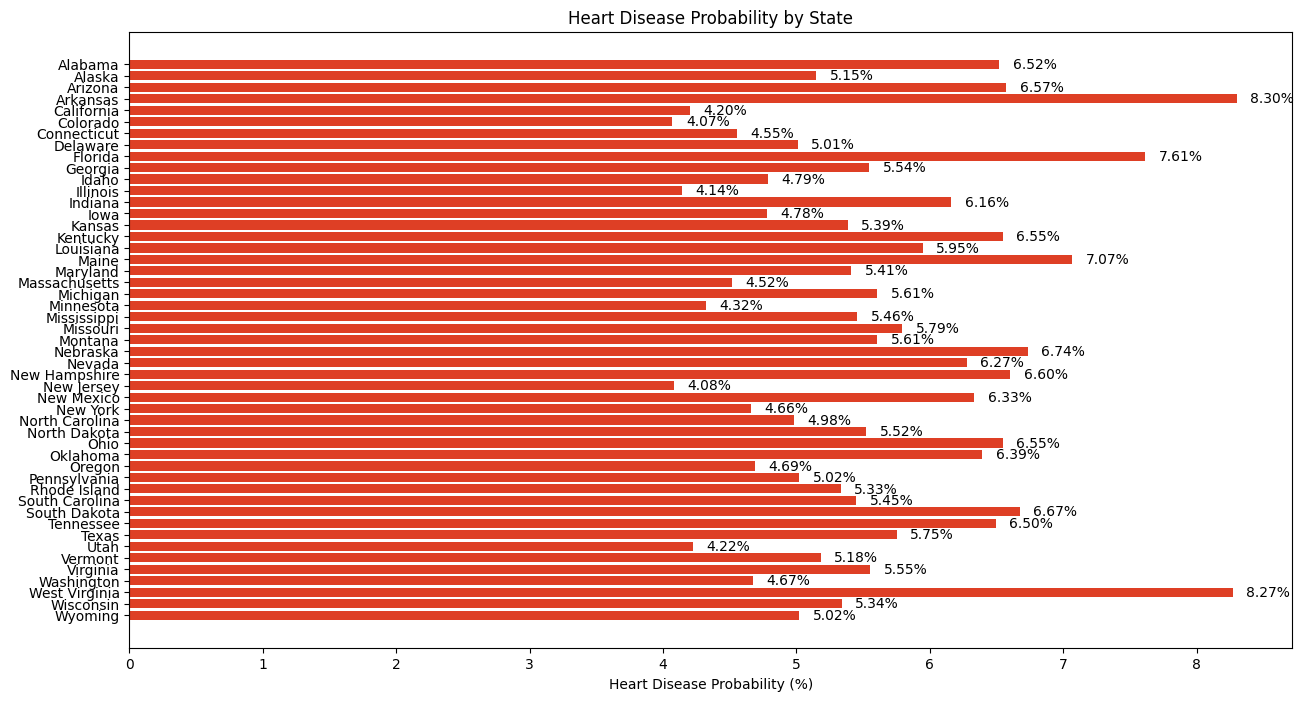

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    "State": [
        "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
        "Florida", "Georgia", "Guam", "Idaho", "Illinois", "Indiana", "Iowa",
        "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
        "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
        "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
        "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
        "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
    ],
    "HeartDiseaseProbability": [
        6.519453, 5.148206, 6.572684, 8.299320, 4.199372, 4.070556, 4.551751, 5.011601, 7.614491,
        5.544395, 5.100065, 4.449607, 4.786621, 4.142693, 6.161396, 4.777856, 5.386493, 6.547866, 5.946844,
        7.068019, 5.411893, 4.519671, 5.605214, 4.322672, 5.605214, 5.455291, 5.792610, 5.605066, 6.735853,
        6.274731, 6.602769, 4.083690, 6.334232, 4.662109, 4.978440, 5.524420, 6.548082, 6.392384, 4.690062,
        5.020154, 4.736695, 5.334190, 5.446902, 6.674234, 6.495413, 5.750540, 4.224828, 5.180599, 5.020747
    ]
}


# States to exclude
states_to_exclude = ["Hawaii", "Puerto Rico", "Virgin Islands", "Guam", "District of Columbia"]

# Filter the DataFrame to exclude specified states
filtered_df = df[~df['State'].isin(states_to_exclude)]

# Create a bar chart
plt.figure(figsize=(15, 8))
bars = plt.barh(filtered_df['State'], filtered_df['HeartDiseaseProbability'], color='#DE3F25')
plt.xlabel('Heart Disease Probability (%)')
plt.title('Heart Disease Probability by State')
plt.gca().invert_yaxis()

# Add percentages at the end of each bar
for bar, percentage in zip(bars, filtered_df['HeartDiseaseProbability']):
    plt.text(percentage + 0.1, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', va='center')

plt.show()


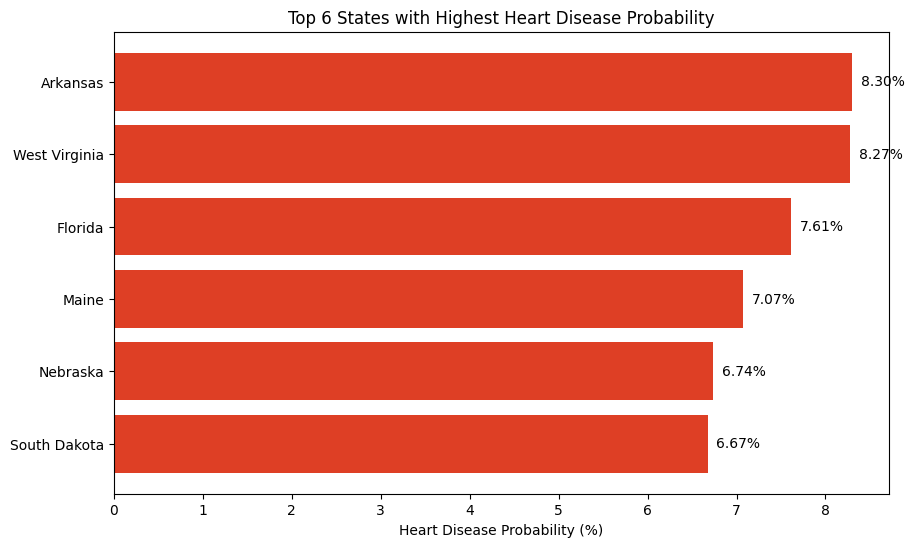

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    "State": [
        "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
        "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
        "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
        "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
        "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
        "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
        "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
    ],
    "HeartDiseaseProbability": [
        6.519453, 5.148206, 6.572684, 8.299320, 4.199372, 4.070556, 4.551751, 5.011601, 7.614491,
        5.544395, 5.100065, 4.449607, 4.786621, 4.142693, 6.161396, 4.777856, 5.386493, 6.547866, 5.946844,
        7.068019, 5.411893, 4.519671, 5.605214, 4.322672, 5.605214, 5.455291, 5.792610, 5.605066, 6.735853,
        6.274731, 6.602769, 4.083690, 6.334232, 4.662109, 4.978440, 5.524420, 6.548082, 6.392384, 4.690062,
        5.020154, 4.736695, 5.334190, 5.446902, 6.674234, 6.495413, 5.750540, 4.224828, 5.180599, 5.020747
    ]
}


# States to exclude (Hawaii, Puerto Rico, Virgin Islands, and Guam)
states_to_exclude = ["Hawaii", "Puerto Rico", "Virgin Islands", "Guam", "District of Columbia"]

# Filter the DataFrame to exclude specified states
filtered_df = df[~df['State'].isin(states_to_exclude)]

# Sort the DataFrame by HeartDiseaseProbability in descending order and take the top 6 states
top_6_states = filtered_df.sort_values(by='HeartDiseaseProbability', ascending=False).head(6)

# Create a bar chart for the top 6 states
plt.figure(figsize=(10, 6))
bars = plt.barh(top_6_states['State'], top_6_states['HeartDiseaseProbability'], color='#DE3F25')
plt.xlabel('Heart Disease Probability (%)')
plt.title('Top 6 States with Highest Heart Disease Probability')
plt.gca().invert_yaxis()

# Add percentages at the end of each bar
for bar, percentage in zip(bars, top_6_states['HeartDiseaseProbability']):
    plt.text(percentage + 0.1, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', va='center')

plt.show()

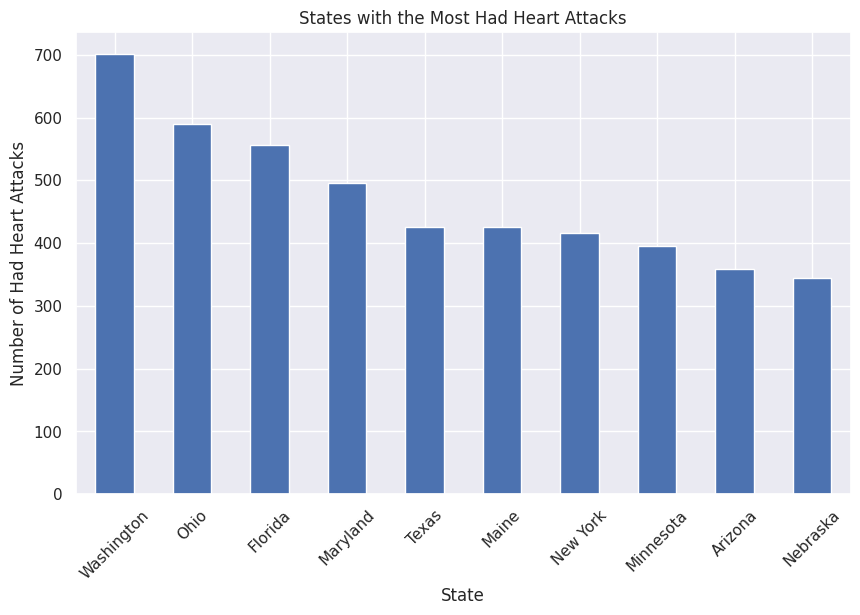

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'State' and count the number of 'HadHeartAttack' occurrences in each state
state_counts = df.groupby('State')['HadHeartAttack'].sum().sort_values(ascending=False)

# Get the top N states with the most 'HadHeartAttacks' (you can change N as needed)
top_n_states = state_counts.head(10)

# Create the bar graph
plt.figure(figsize=(10, 6))
top_n_states.plot(kind='bar')
plt.title('States with the Most Had Heart Attacks')
plt.xlabel('State')
plt.ylabel('Number of Had Heart Attacks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
selected_columns = [
    'HadHeartAttack',
    'GeneralHealth',
    'PhysicalHealthDays',
    'MentalHealthDays',
    # Add more columns of interest here
]

heart_disease_df = df[selected_columns]

In [ ]:
correlation_matrix = heart_disease_data.corr()

<ipython-input-95-9292bc8fc22b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
print(correlation_matrix)

                    PhysicalHealthDays  MentalHealthDays  SleepHours  \
PhysicalHealthDays            1.000000          0.365890   -0.065805   
MentalHealthDays              0.365890          1.000000   -0.116499   
SleepHours                   -0.065805         -0.116499    1.000000   
HeightInMeters               -0.057432         -0.078967    0.024446   
WeightInKilograms             0.056157          0.034999   -0.008861   
BMI                           0.095484          0.088132   -0.022024   
AgeNumeric                   -0.060672         -0.242205    0.185863   

                    HeightInMeters  WeightInKilograms       BMI  AgeNumeric  
PhysicalHealthDays       -0.057432           0.056157  0.095484   -0.060672  
MentalHealthDays         -0.078967           0.034999  0.088132   -0.242205  
SleepHours                0.024446          -0.008861 -0.022024    0.185863  
HeightInMeters            1.000000           0.474256 -0.044321   -0.078081  
WeightInKilograms         0.47425

                    HaveHeartDisease  PhysicalHealthDays  MentalHealthDays  \
HaveHeartDisease            1.000000            0.133422          0.025888   
PhysicalHealthDays          0.133422            1.000000          0.306807   
MentalHealthDays            0.025888            0.306807          1.000000   
SleepHours                  0.003634           -0.056058         -0.130095   
HeightInMeters              0.023059           -0.049188         -0.056011   
WeightInKilograms           0.038432            0.077495          0.042434   
BMI                         0.030409            0.116899          0.082174   
AgeNumeric                  0.173231            0.089433         -0.189469   

                    SleepHours  HeightInMeters  WeightInKilograms       BMI  \
HaveHeartDisease      0.003634        0.023059           0.038432  0.030409   
PhysicalHealthDays   -0.056058       -0.049188           0.077495  0.116899   
MentalHealthDays     -0.130095       -0.056011           0.0

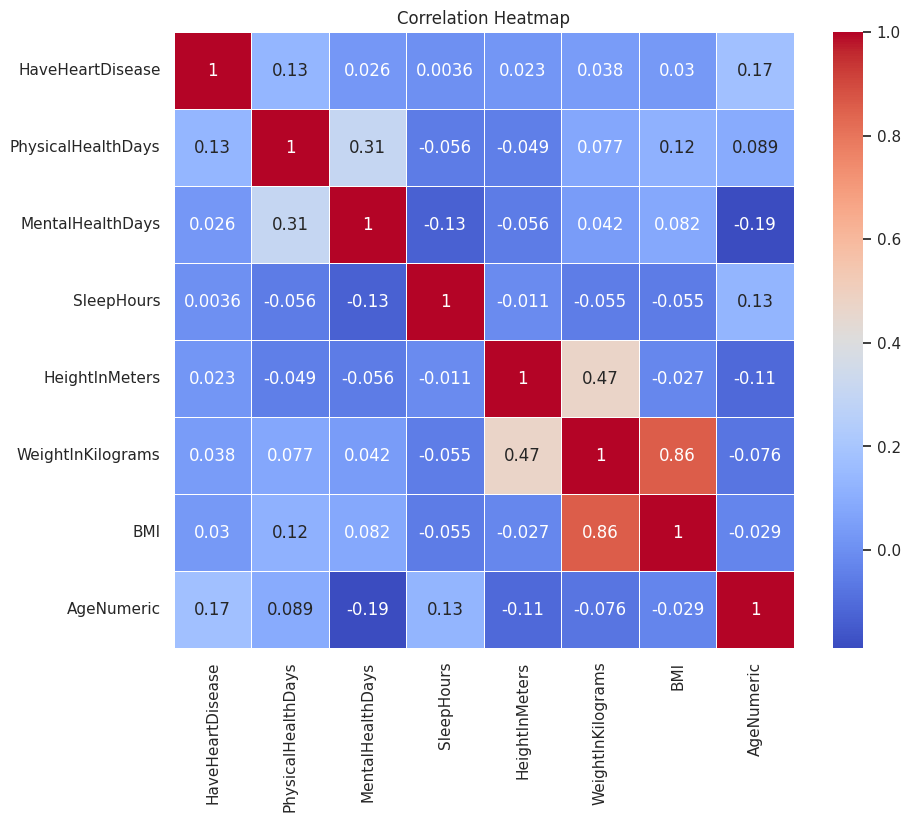

In [ ]:
# Select the columns of interest, including 'HadHeartAttack'
selected_columns = [
    'HaveHeartDisease',
    'PhysicalHealthDays',
    'MentalHealthDays',
    'SleepHours',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'AgeNumeric',
]

heart_disease_df = df[selected_columns]

# Calculate correlations
correlation_matrix = heart_disease_df.corr()

# Print or visualize the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()